In [ ]:
!pip install lazypredict
!pip install imbalanced-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_excel(r"/content/data (1).xlsx", sheet_name='data')
data.head()

appointmentId inspectionStartTime  year  month  \
0         aj_01 2019-02-03 15:43:48  2008      8   
1         aj_02 2019-01-16 13:02:12  2007      5   
2         aj_03 2019-02-09 13:31:04  2012      5   
3         aj_04 2019-01-18 11:02:53  2013      1   
4         aj_05 2019-01-27 12:12:06  2011      7   

  engineTransmission_battery_value engineTransmission_battery_cc_value_0  \
0                               No                                  Weak   
1                              Yes                                   NaN   
2                              Yes                                   NaN   
3                              Yes                                   NaN   
4                              Yes                                   NaN   

  engineTransmission_battery_cc_value_1 engineTransmission_battery_cc_value_2  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

  engineTransmission_battery_cc_value_3 engineTransmission_battery_cc_value_4  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

   ... engineTransmission_gearShifting_cc_value_1  \
0  ...                                        NaN   
1  ...                                        NaN   
2  ...                                        NaN   
3  ...                                        NaN   
4  ...                                        NaN   

  engineTransmission_gearShifting_cc_value_2  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  engineTransmission_comments_value_0  \
0                          Pickup Low   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

       engineTransmission_comments_value_1  \
0  Starter Motor / Solenoid malfunctioning   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  engineTransmission_comments_value_2 engineTransmission_comments_value_3  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

  engineTransmission_comments_value_4     fuel_type odometer_reading  \
0                                 NaN  Petrol + CNG           124600   
1                                 NaN  Petrol + CNG            78108   
2                                 NaN        Diesel            93348   
3                                 NaN  Petrol + CNG            48233   
4                                 NaN  Petrol + CNG            74368   

  rating_engineTransmission  
0                      3.00  
1                      4.00  
2                      3.50  
3                      3.50  
4                      4.00  

[5 rows x 73 columns]

In [ ]:
nan_percentage = data.isna().mean() * 100
# Filter columns where the percentage of NaN values is greater than 99%
columns_with_more_than_90perc_nan = nan_percentage[nan_percentage > 99].index.tolist()
print("Columns with more than 99% NaN values:", len(columns_with_more_than_90perc_nan))
try:
    data.drop(columns=columns_with_more_than_90perc_nan, inplace=True)
    data.drop(columns=["appointmentId"], inplace=True)
    data.drop(columns=["inspectionStartTime"], inplace=True)
except:
  pass
data.head()


Columns with more than 99% NaN values: 23


year  month engineTransmission_battery_value  \
0  2008      8                               No   
1  2007      5                              Yes   
2  2012      5                              Yes   
3  2013      1                              Yes   
4  2011      7                              Yes   

  engineTransmission_battery_cc_value_0 engineTransmission_battery_cc_value_1  \
0                                  Weak                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

  engineTransmission_engineoilLevelDipstick_value  \
0                                             Yes   
1                                             Yes   
2                                             Yes   
3                                             Yes   
4                                             Yes   

  engineTransmission_engineOilLevelDipstick_cc_value_0  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

  engineTransmission_engineOil engineTransmission_engineOil_cc_value_0  \
0                           No                                 Leaking   
1                           No                                 Leaking   
2                           No                                   Dirty   
3                           No                                   Dirty   
4                           No                                 Leaking   

  engineTransmission_engineOil_cc_value_1  ...  \
0                                   Dirty  ...   
1                                   Dirty  ...   
2                                     NaN  ...   
3                                     NaN  ...   
4               Leakage from Tappet Cover  ...   

  engineTransmission_clutch_cc_value_2 engineTransmission_gearShifting_value  \
0                                  NaN                                   Yes   
1                                  NaN                                   Yes   
2                                  NaN                                   Yes   
3                                  NaN                                   Yes   
4                                  NaN                                   Yes   

  engineTransmission_gearShifting_cc_value_0  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  engineTransmission_gearShifting_cc_value_1  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  engineTransmission_comments_value_0  \
0                          Pickup Low   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

       engineTransmission_comments_value_1  \
0  Starter Motor / Solenoid malfunctioning   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  engineTransmission_comments_value_2     fuel_type odometer_reading  \
0                                 NaN  Petrol + CNG           124600   
1                                 NaN  Petrol + CNG            78108

[0 1 2 3 4 5 6 7 8 9] [    1  1456     6   117   420  4379  5944 10152  2209  1623]


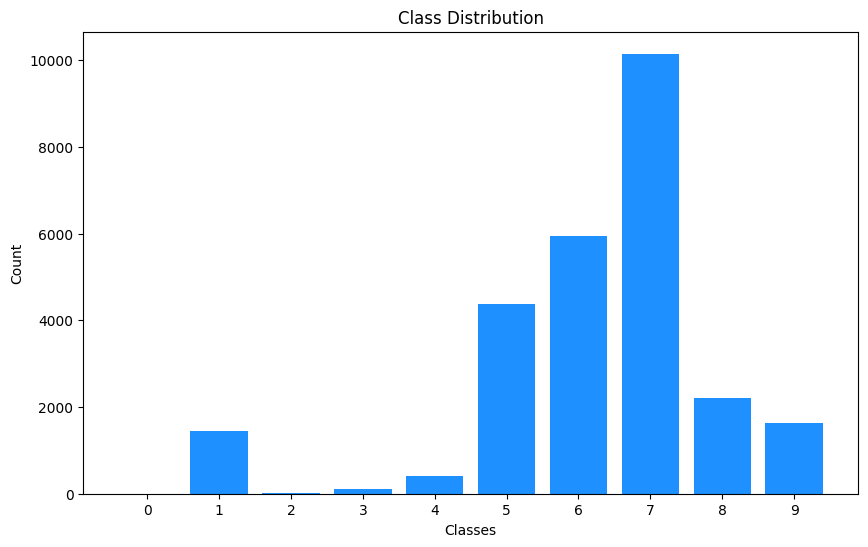

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
data['rating_engineTransmission']= lab_enc.fit_transform(data['rating_engineTransmission'])

y = np.array(data['rating_engineTransmission'])  # Convert list to numpy array if necessary

# Count the occurrences of each class
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

# Plotting the class distribution
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='dodgerblue')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(unique)  # Ensure all class labels are shown as x-ticks
plt.show()


In [ ]:
# Filter out classes with fewer than 20% record count of max class count samples
valid_class_count = int((20 * max(counts)/100)) #20%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame and 'rating' is the target column
y = data['rating_engineTransmission']
X = data.drop('rating_engineTransmission', axis=1)  # Drop the target column to isolate features

# Filter out classes with fewer than N samples, e.g., N=2
class_counts =  data['rating_engineTransmission'].value_counts()
valid_classes = class_counts[class_counts >= valid_class_count].index
mask =  data['rating_engineTransmission'].isin(valid_classes)
data = data[mask]
class_counts =  data['rating_engineTransmission'].value_counts()
class_counts

rating_engineTransmission
7    10152
6     5944
5     4379
8     2209
Name: count, dtype: int64

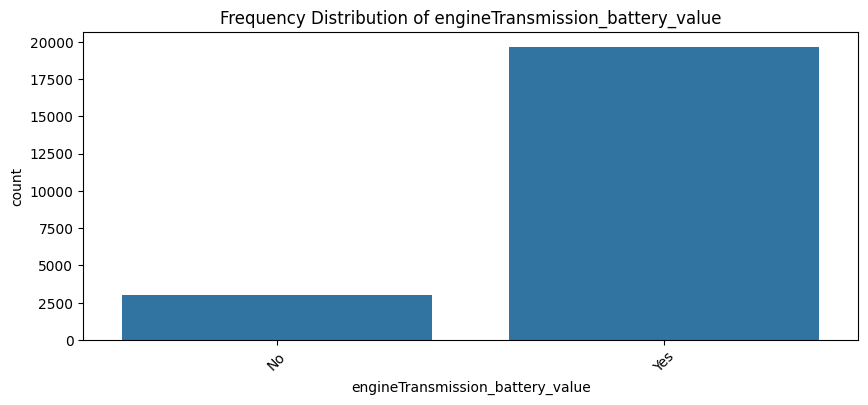

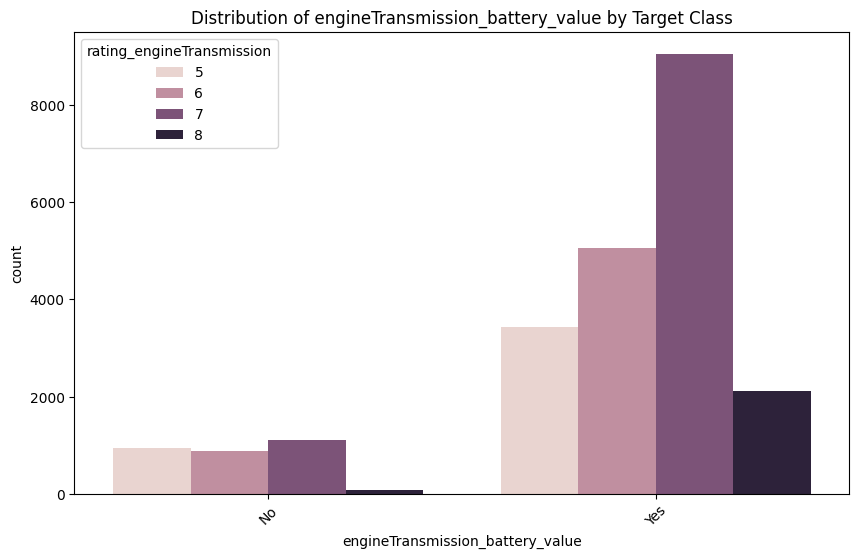

Chi-square test for engineTransmission_battery_value vs Target:
Chi2 Statistic: 486.6581517658708, P-value: 3.715068169423782e-105



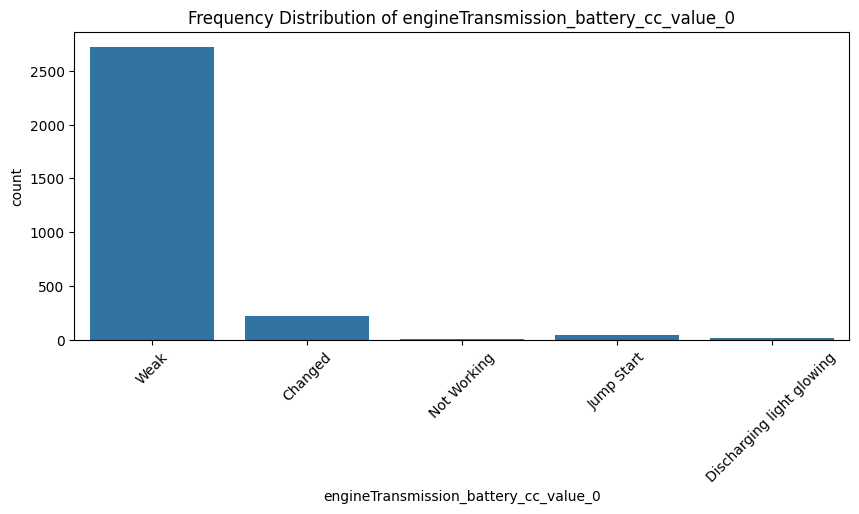

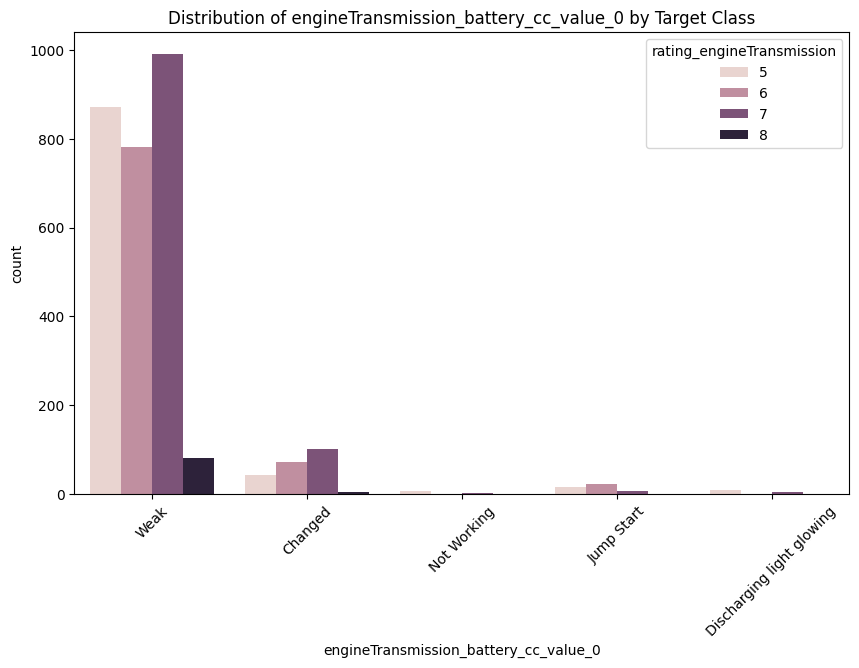

Chi-square test for engineTransmission_battery_cc_value_0 vs Target:
Chi2 Statistic: 42.491206680326265, P-value: 2.7525429060444574e-05



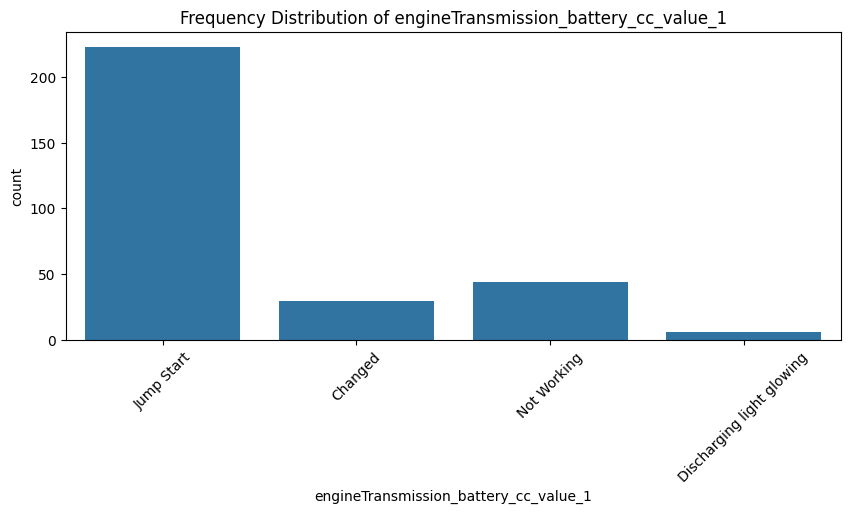

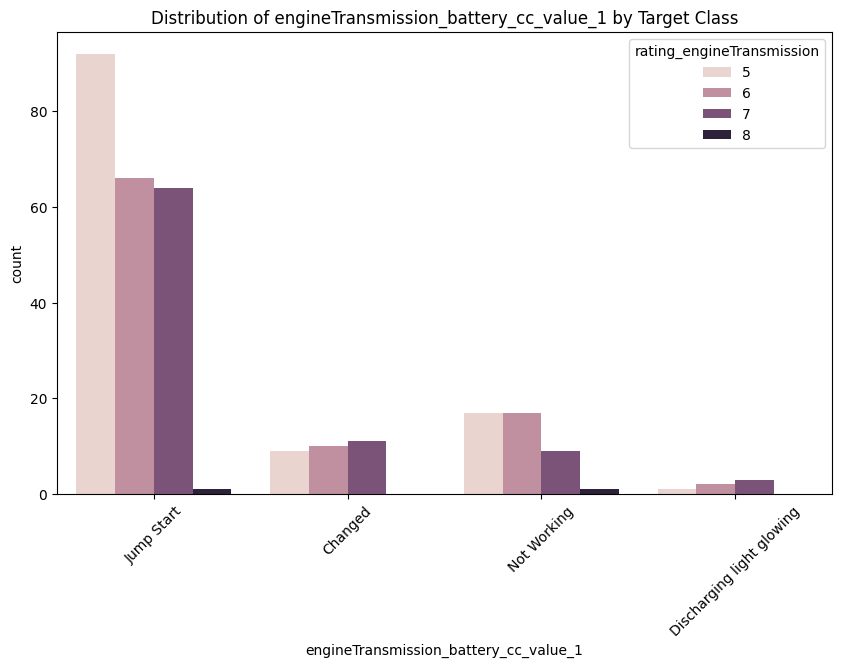

Chi-square test for engineTransmission_battery_cc_value_1 vs Target:
Chi2 Statistic: 7.449823091429907, P-value: 0.5903930278216831



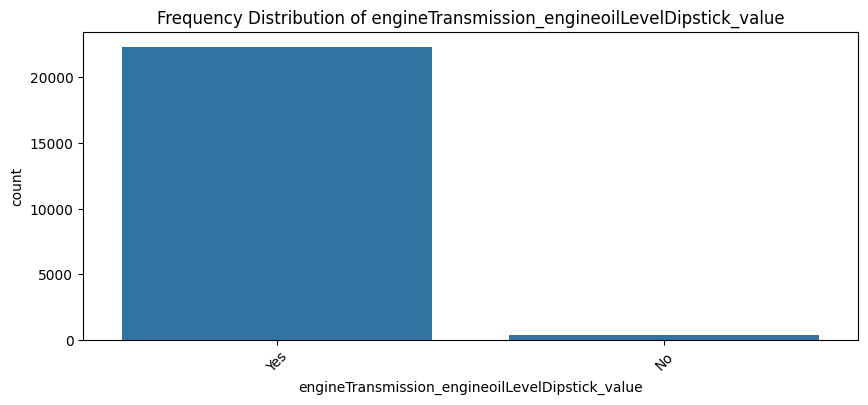

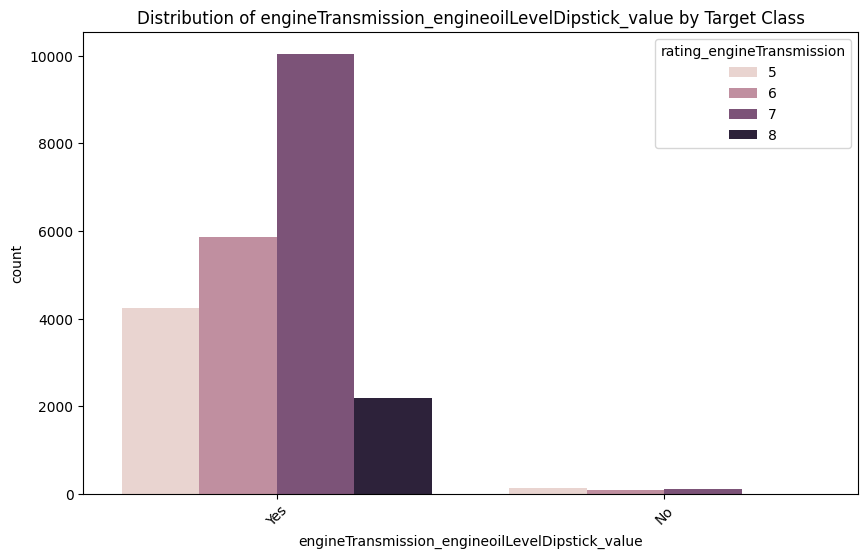

Chi-square test for engineTransmission_engineoilLevelDipstick_value vs Target:
Chi2 Statistic: 120.34745729327072, P-value: 6.495385757726487e-26



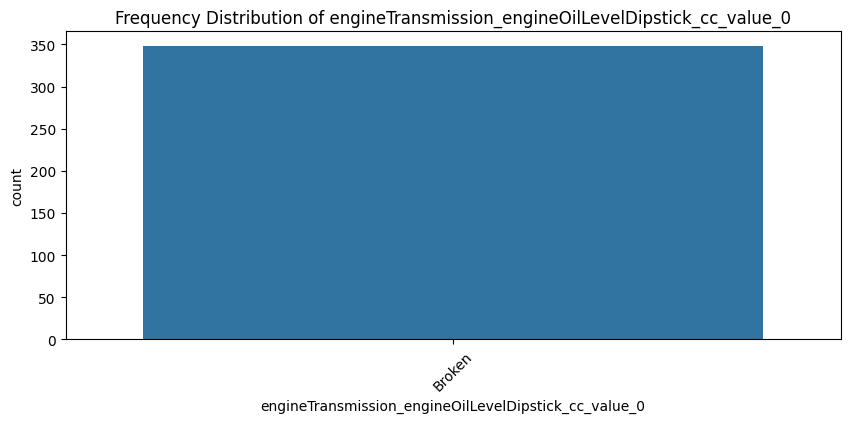

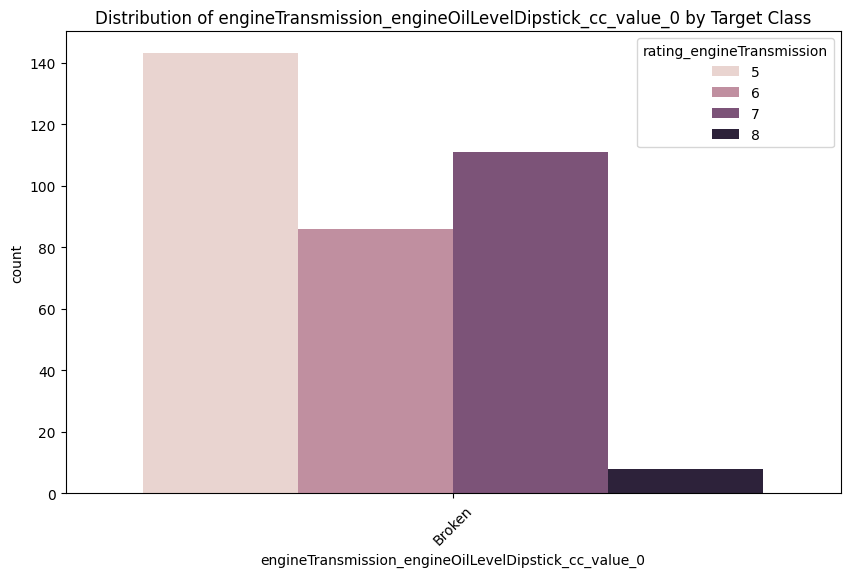

Chi-square test for engineTransmission_engineOilLevelDipstick_cc_value_0 vs Target:
Chi2 Statistic: 0.0, P-value: 1.0



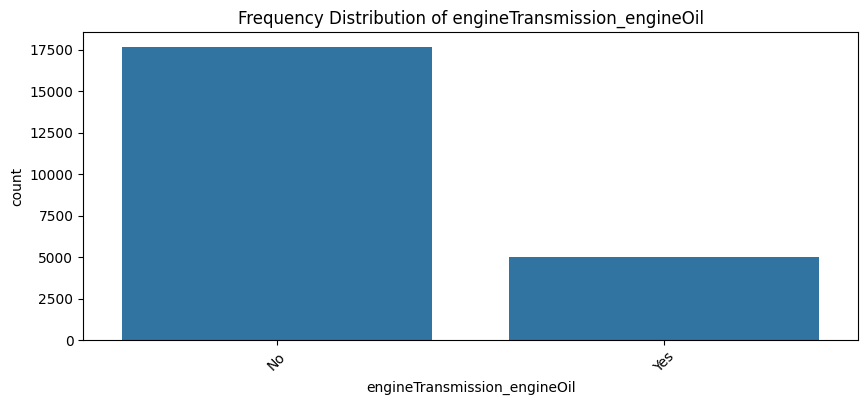

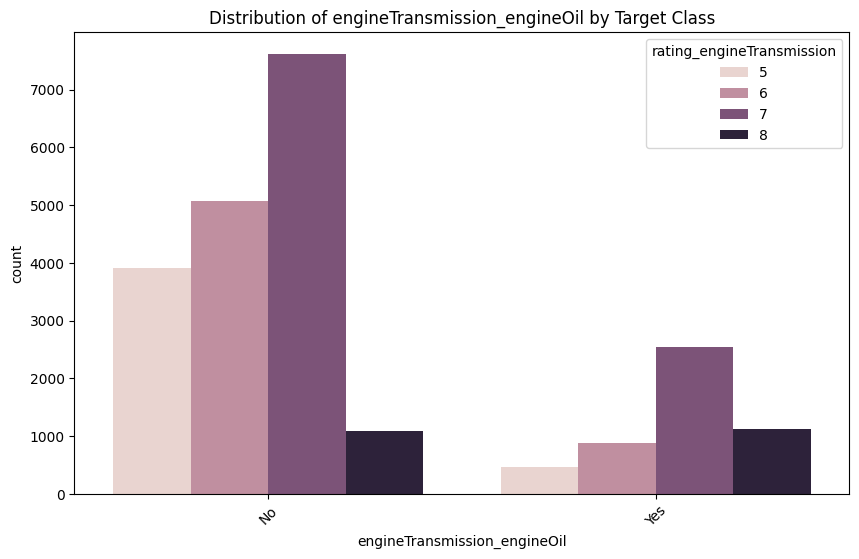

Chi-square test for engineTransmission_engineOil vs Target:
Chi2 Statistic: 1600.8429796235685, P-value: 0.0



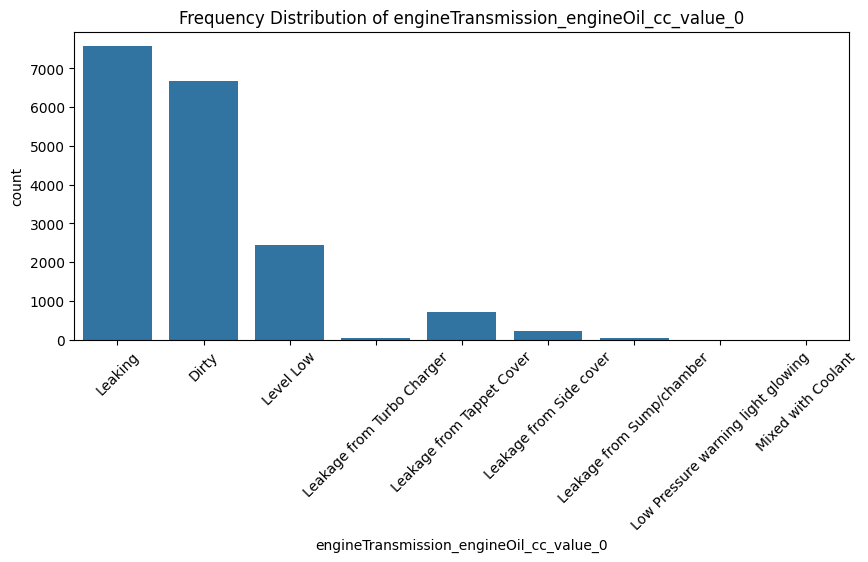

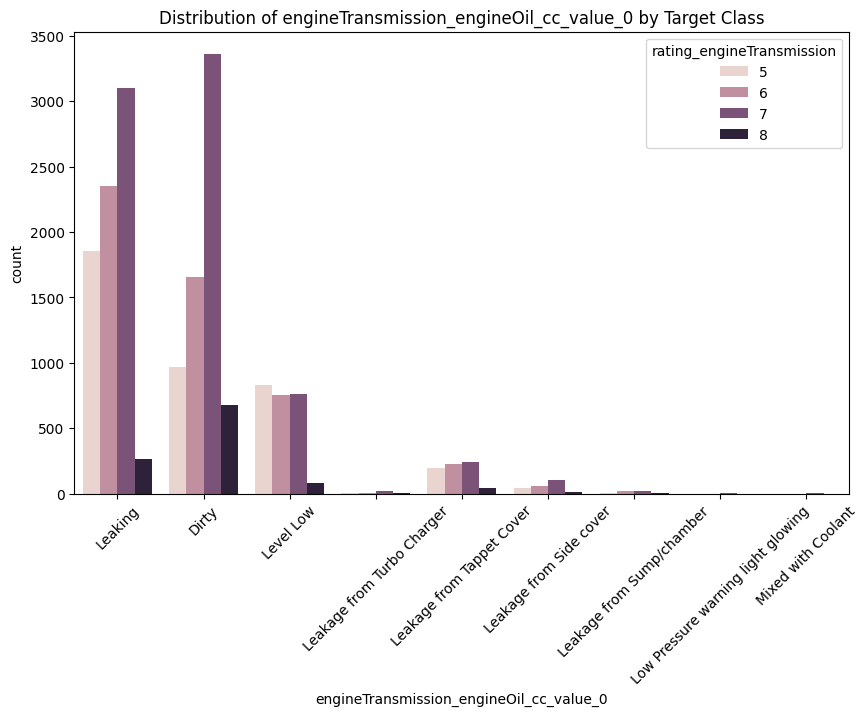

Chi-square test for engineTransmission_engineOil_cc_value_0 vs Target:
Chi2 Statistic: 909.1410724032182, P-value: 1.681114552818031e-176



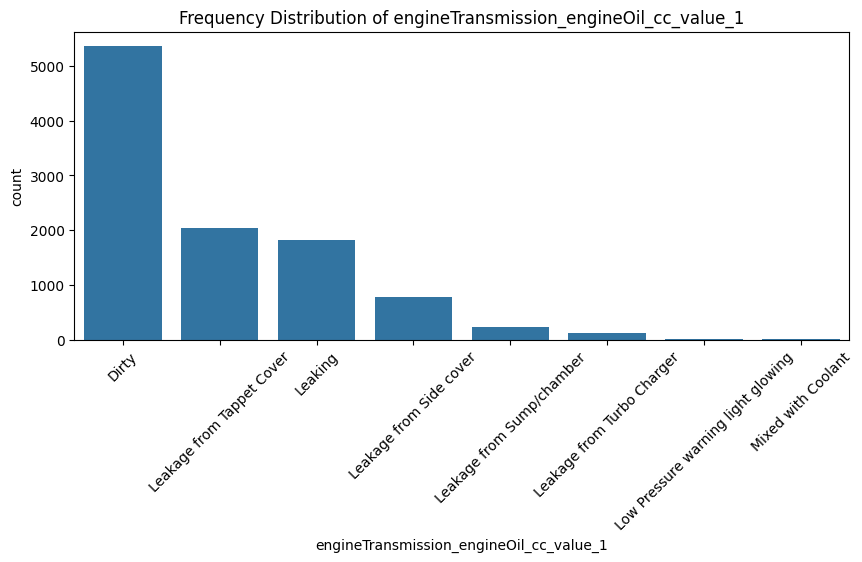

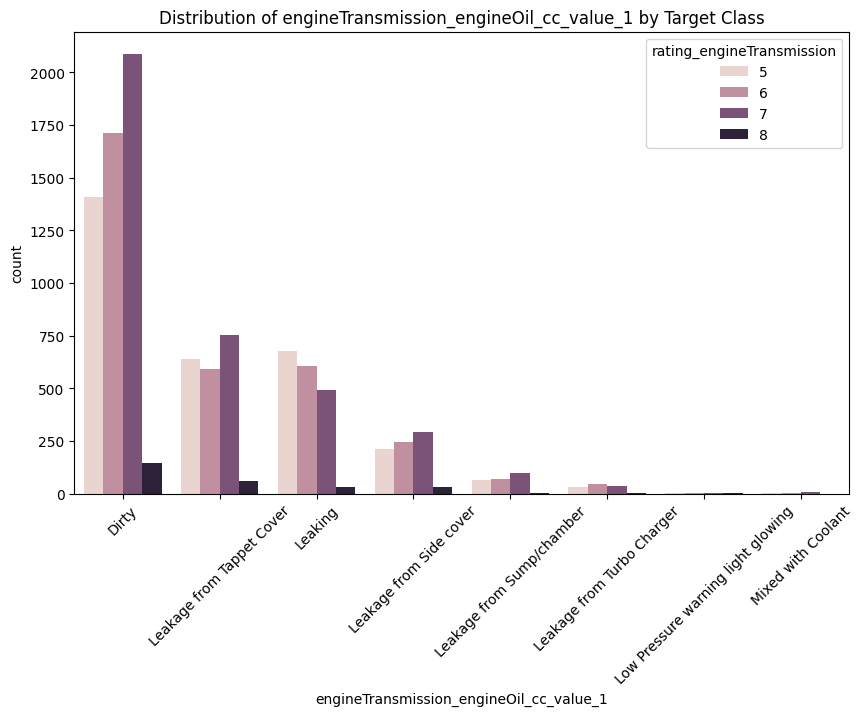

Chi-square test for engineTransmission_engineOil_cc_value_1 vs Target:
Chi2 Statistic: 145.6661758122629, P-value: 1.165424079605296e-20



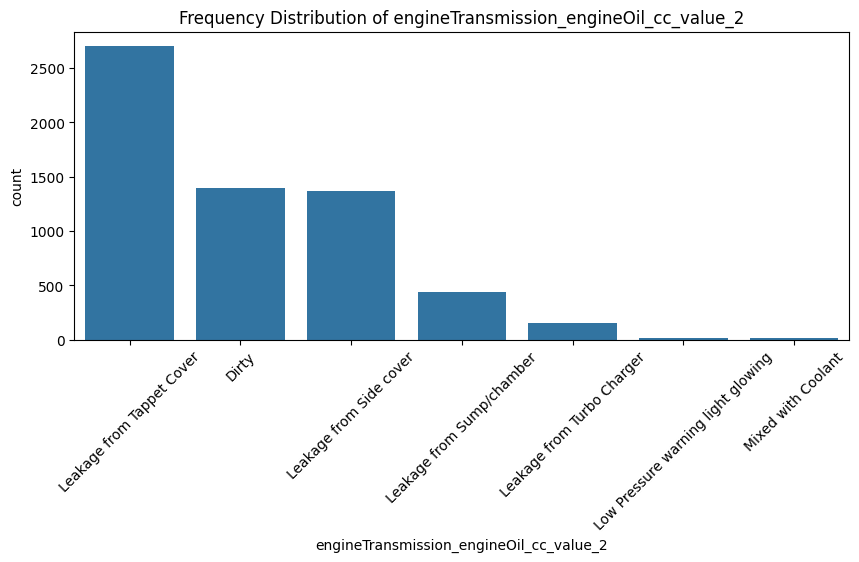

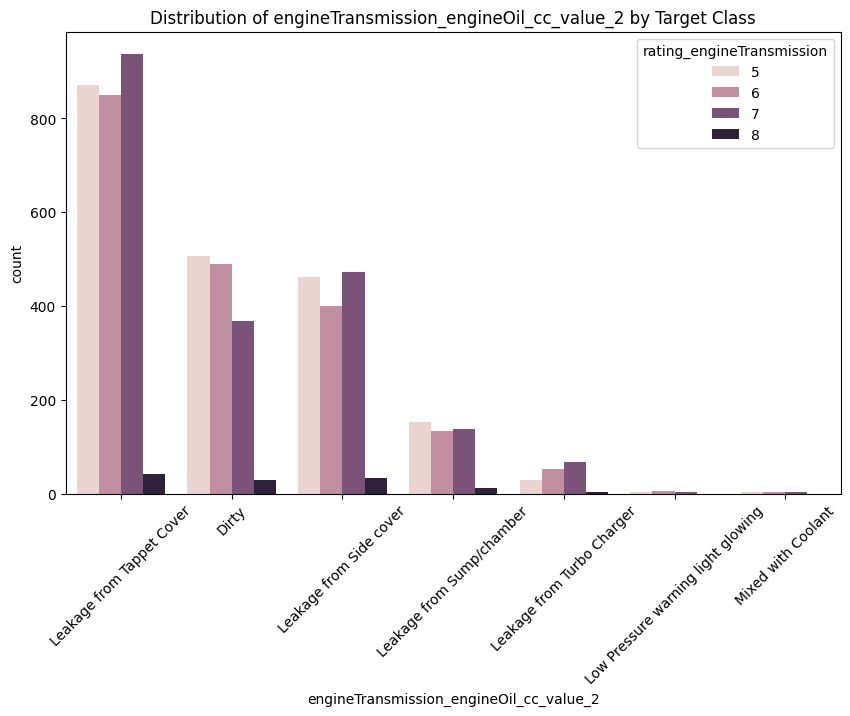

Chi-square test for engineTransmission_engineOil_cc_value_2 vs Target:
Chi2 Statistic: 58.42205875166307, P-value: 3.6712054757887657e-06



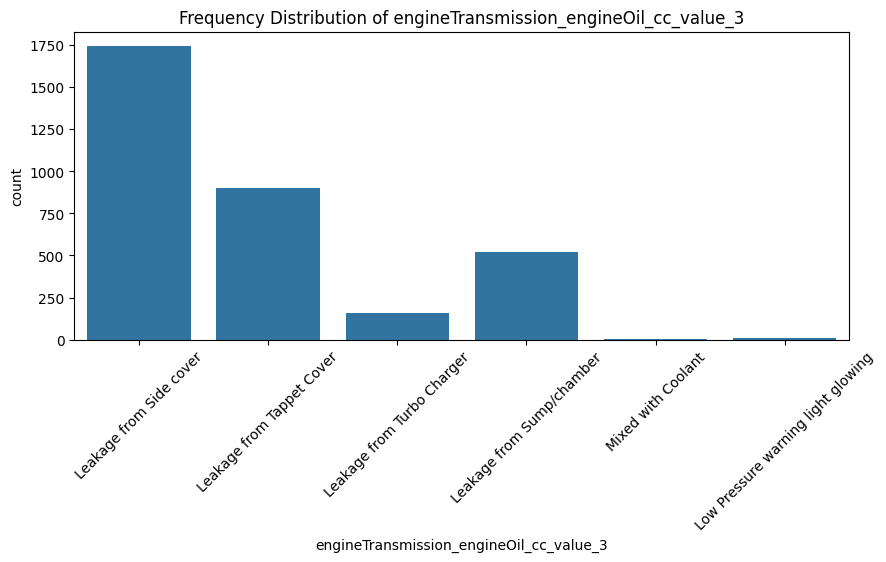

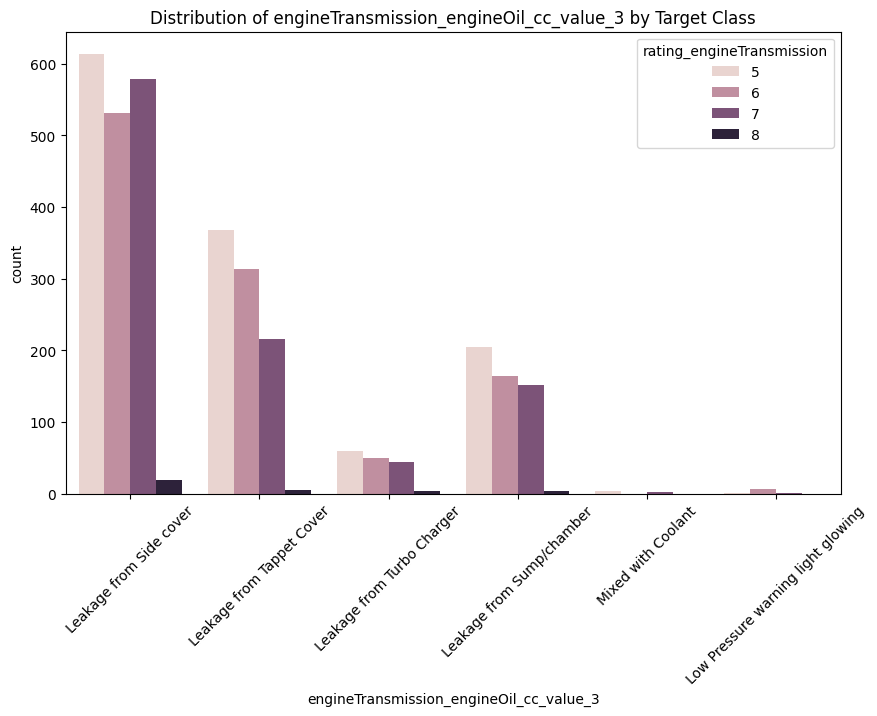

Chi-square test for engineTransmission_engineOil_cc_value_3 vs Target:
Chi2 Statistic: 42.63205116631946, P-value: 0.00017954543778676293



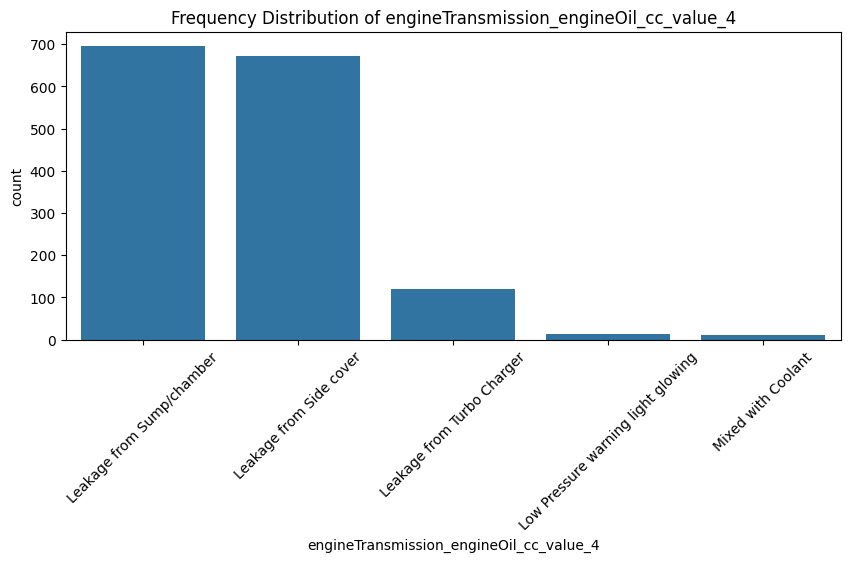

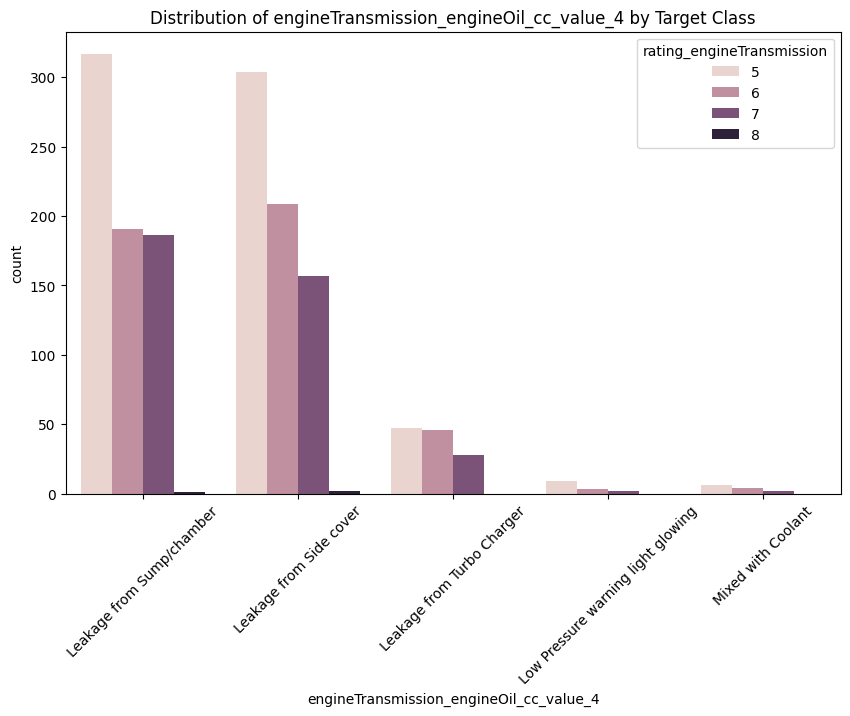

Chi-square test for engineTransmission_engineOil_cc_value_4 vs Target:
Chi2 Statistic: 10.478817542129837, P-value: 0.5740304879767442



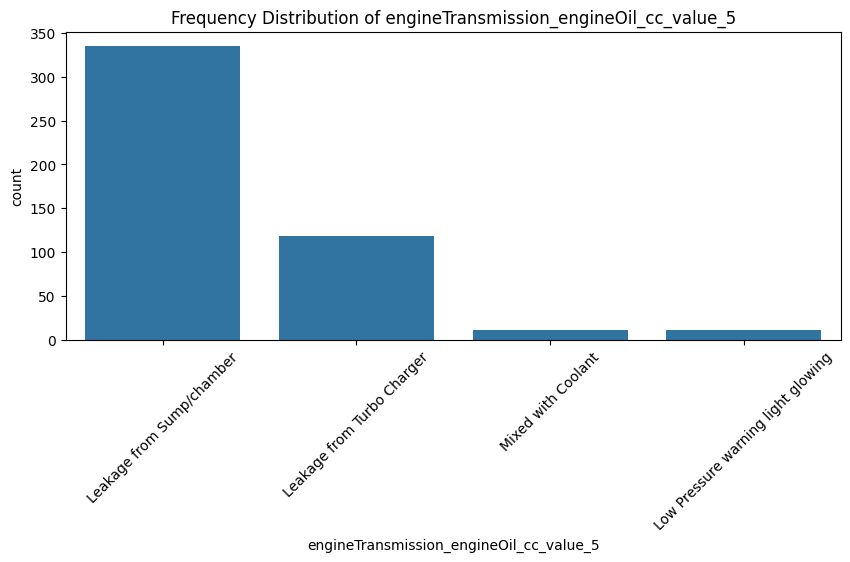

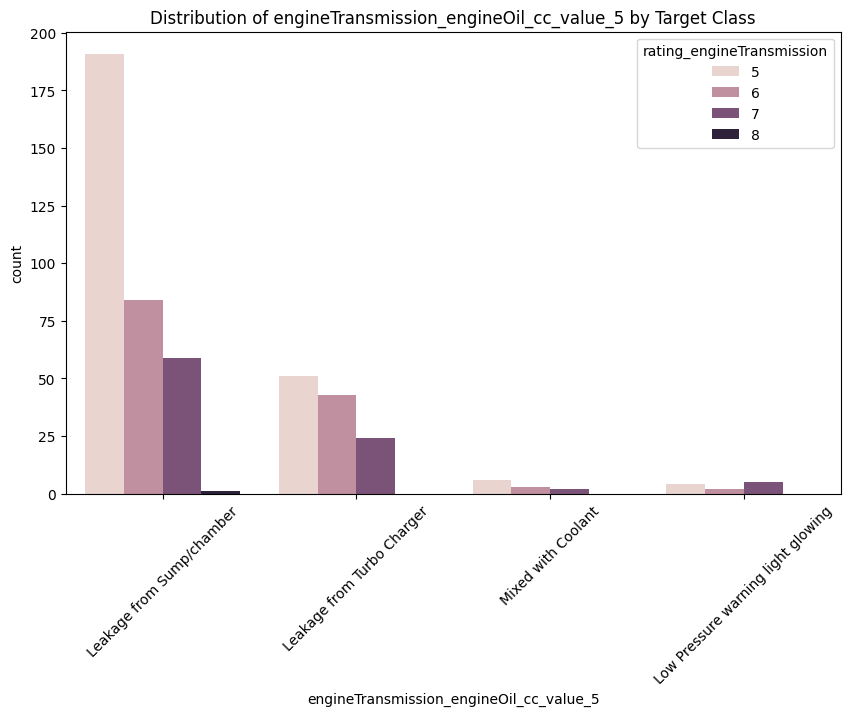

Chi-square test for engineTransmission_engineOil_cc_value_5 vs Target:
Chi2 Statistic: 13.093031298260929, P-value: 0.15844168372680312



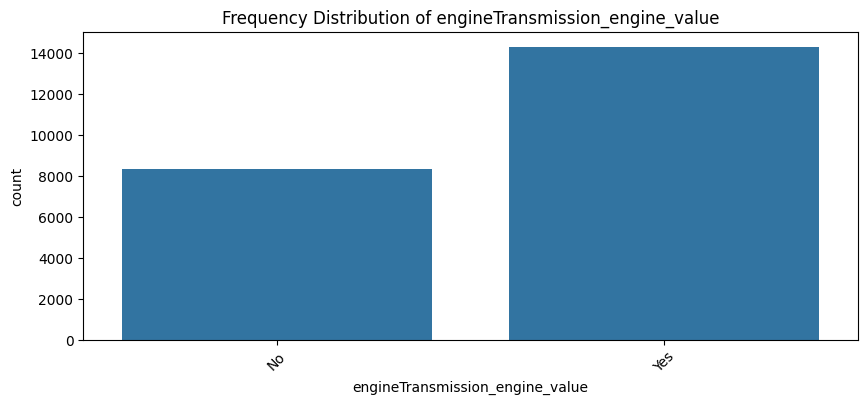

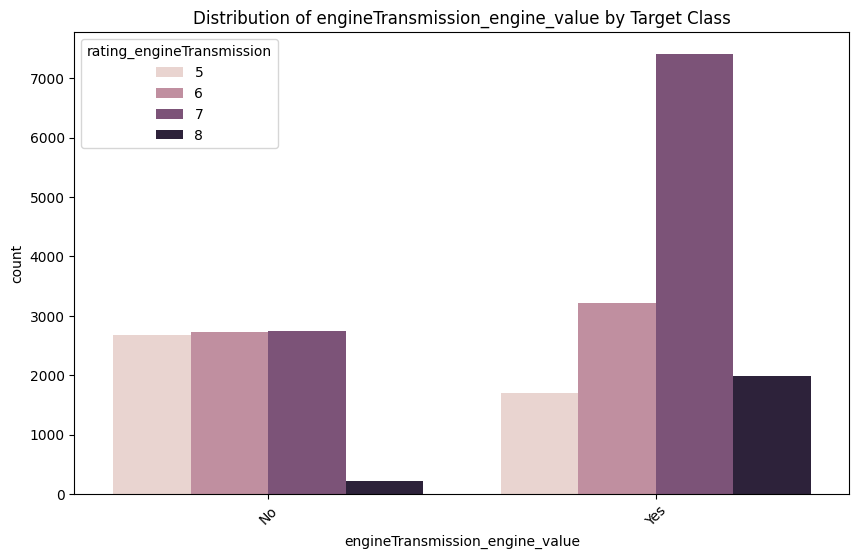

Chi-square test for engineTransmission_engine_value vs Target:
Chi2 Statistic: 2433.478971648136, P-value: 0.0



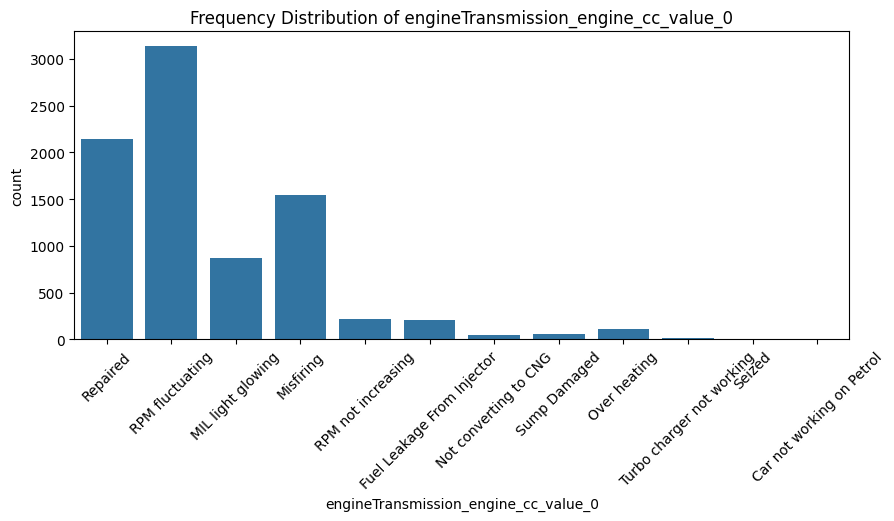

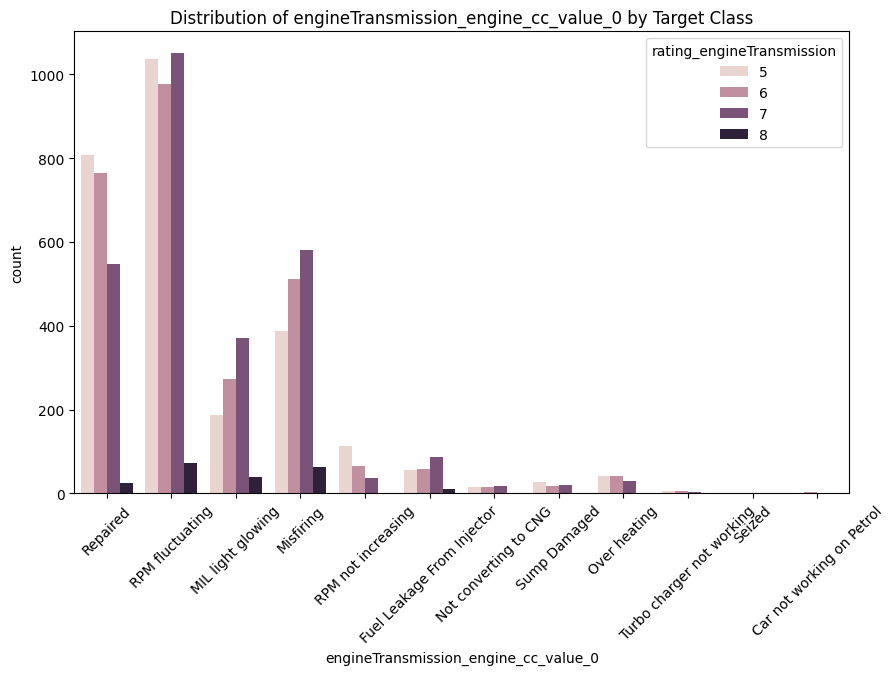

Chi-square test for engineTransmission_engine_cc_value_0 vs Target:
Chi2 Statistic: 277.20345698974586, P-value: 2.1844862892285368e-40



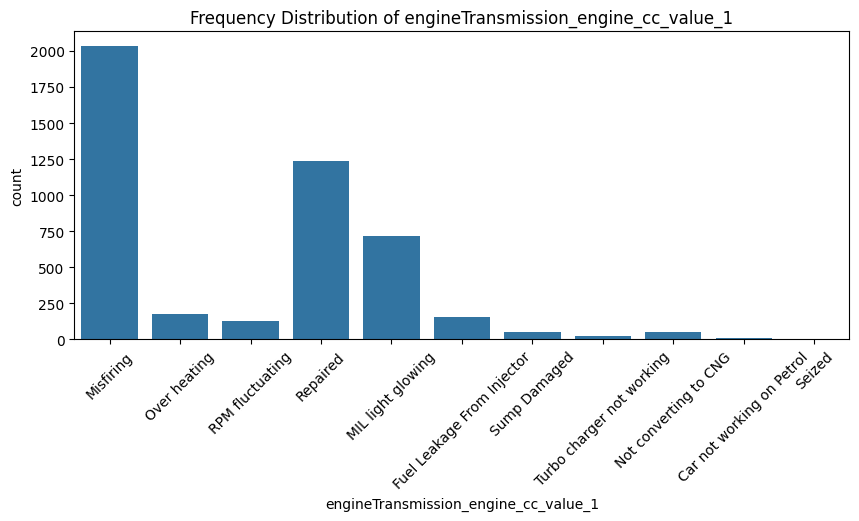

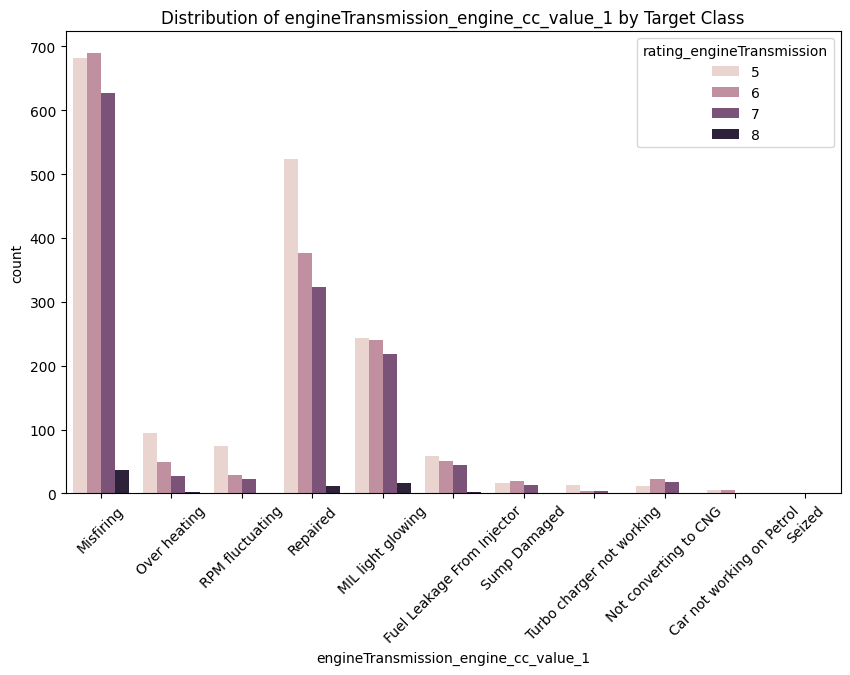

Chi-square test for engineTransmission_engine_cc_value_1 vs Target:
Chi2 Statistic: 107.96339770913254, P-value: 9.860896447539906e-11



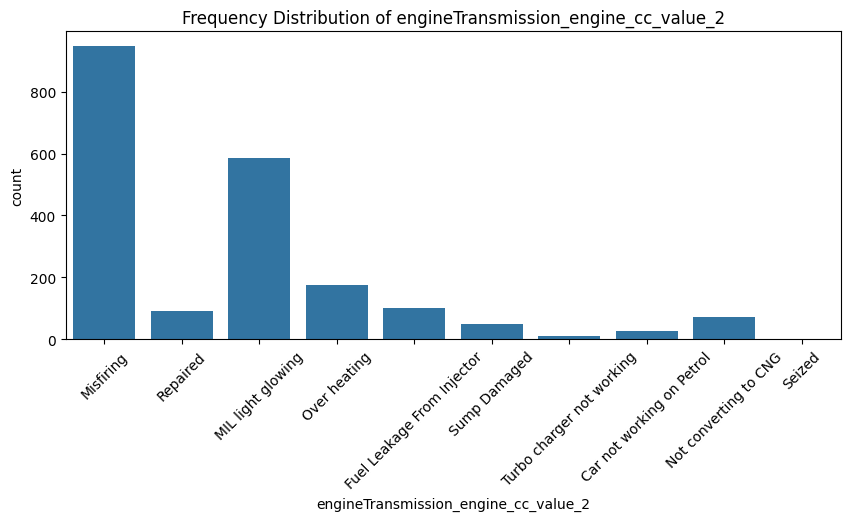

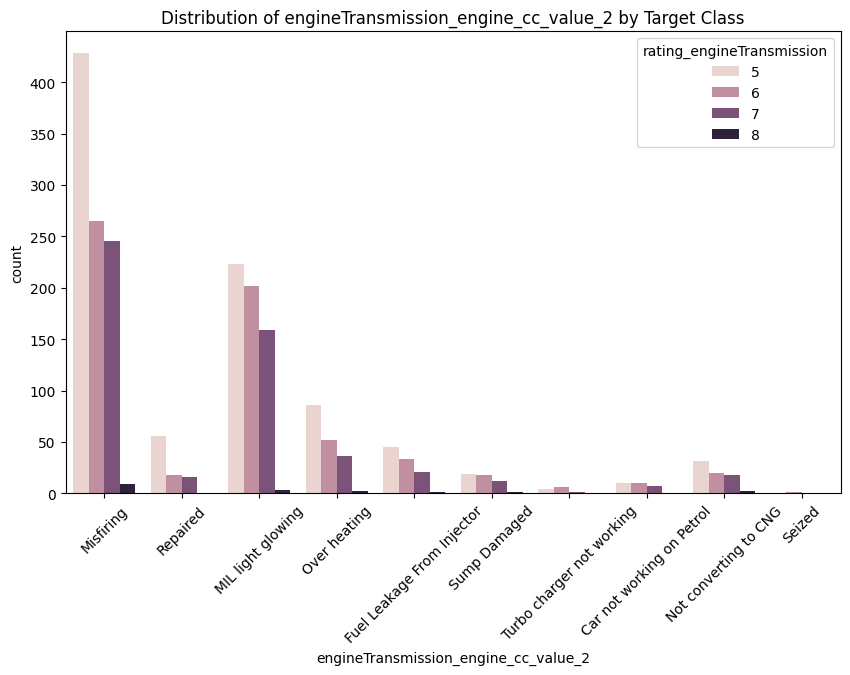

Chi-square test for engineTransmission_engine_cc_value_2 vs Target:
Chi2 Statistic: 40.07837079982738, P-value: 0.05037830760854667



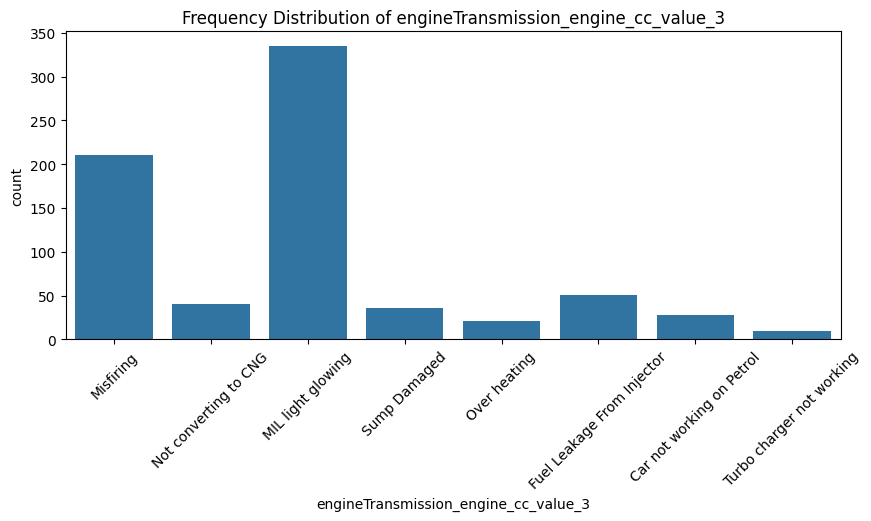

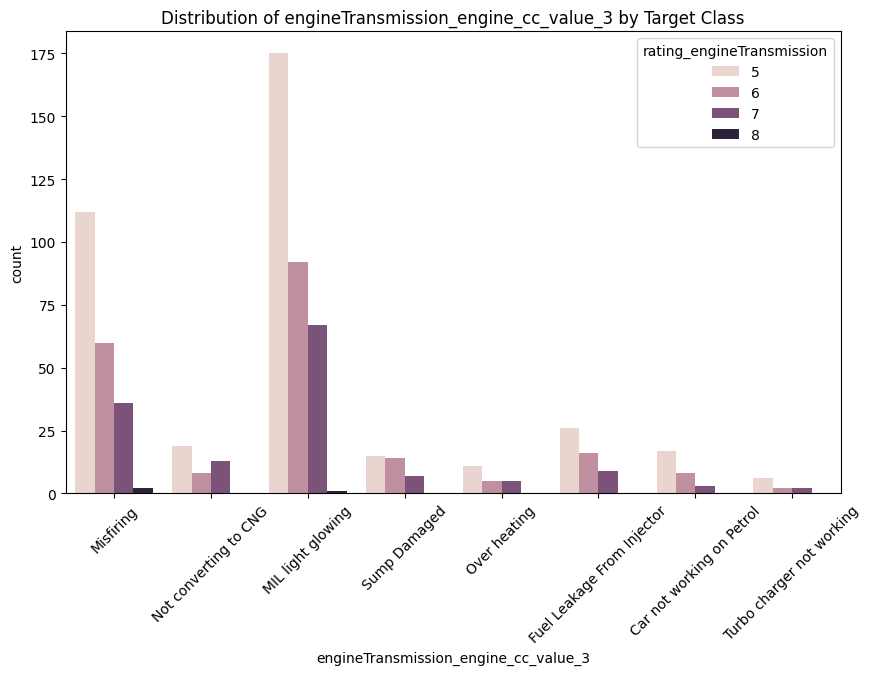

Chi-square test for engineTransmission_engine_cc_value_3 vs Target:
Chi2 Statistic: 12.466021104962934, P-value: 0.9261744754789843



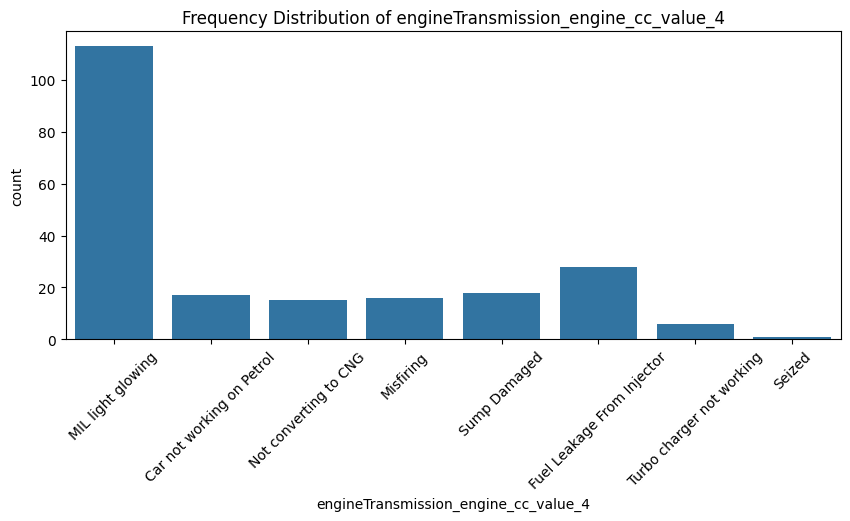

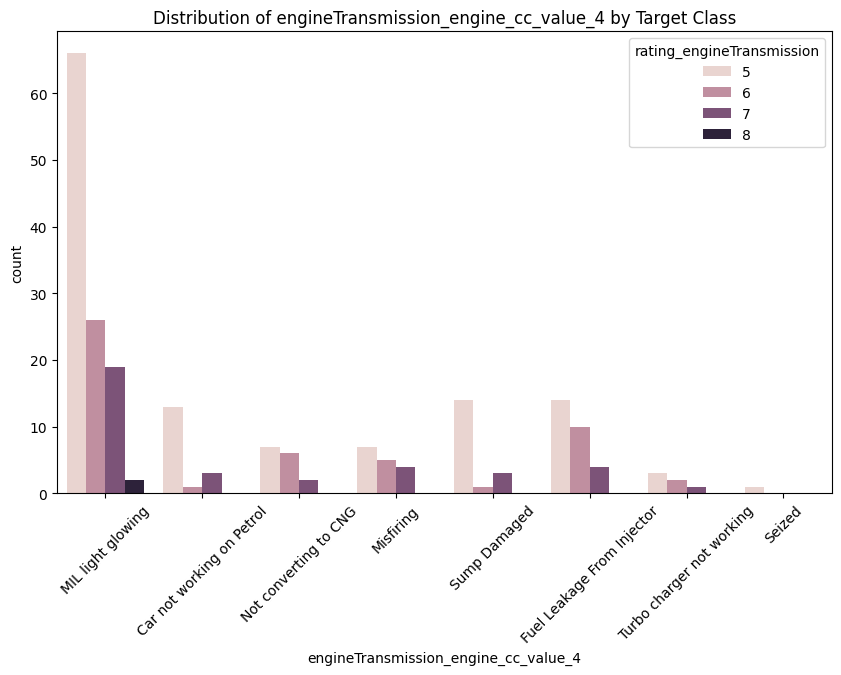

Chi-square test for engineTransmission_engine_cc_value_4 vs Target:
Chi2 Statistic: 15.563167022959338, P-value: 0.7936710138213641



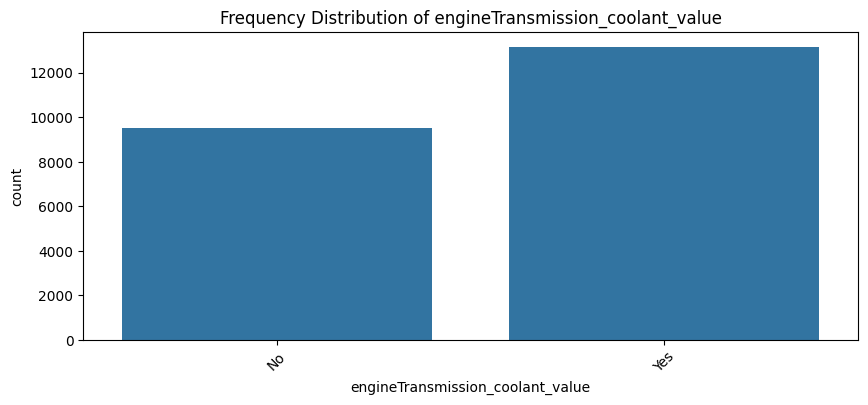

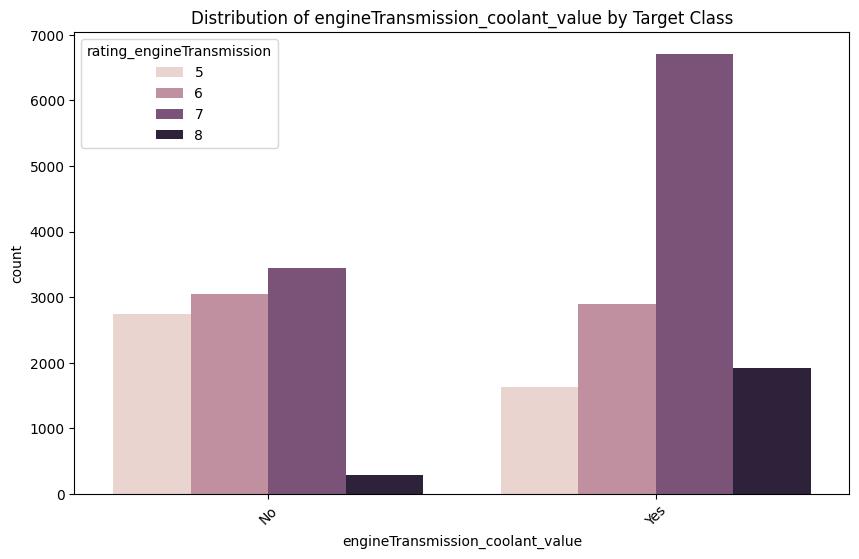

Chi-square test for engineTransmission_coolant_value vs Target:
Chi2 Statistic: 2010.2686900098038, P-value: 0.0



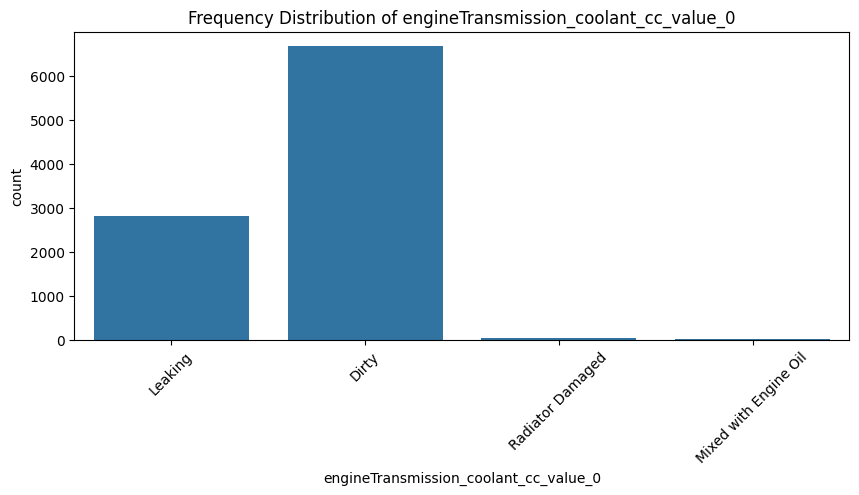

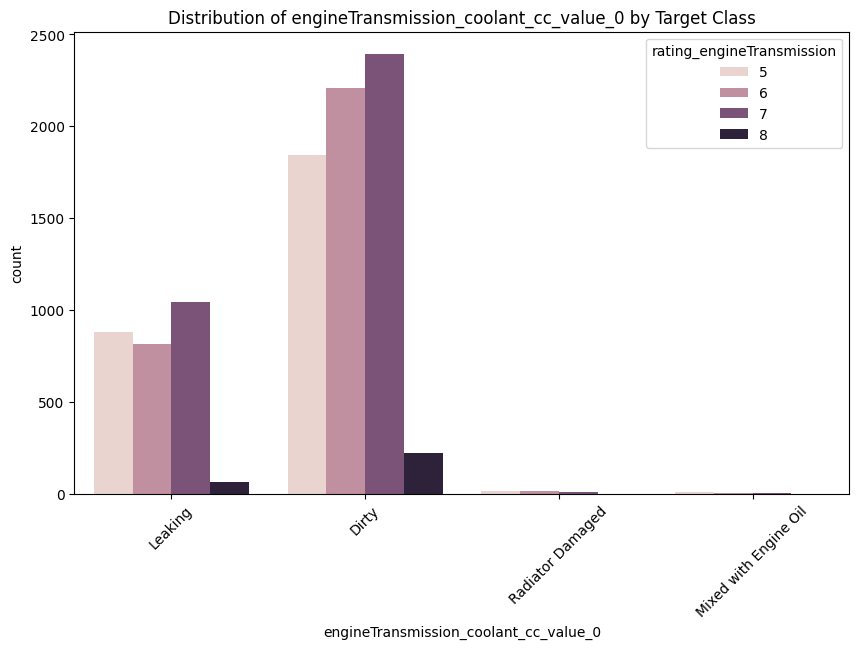

Chi-square test for engineTransmission_coolant_cc_value_0 vs Target:
Chi2 Statistic: 37.89522885064909, P-value: 1.8202120522382818e-05



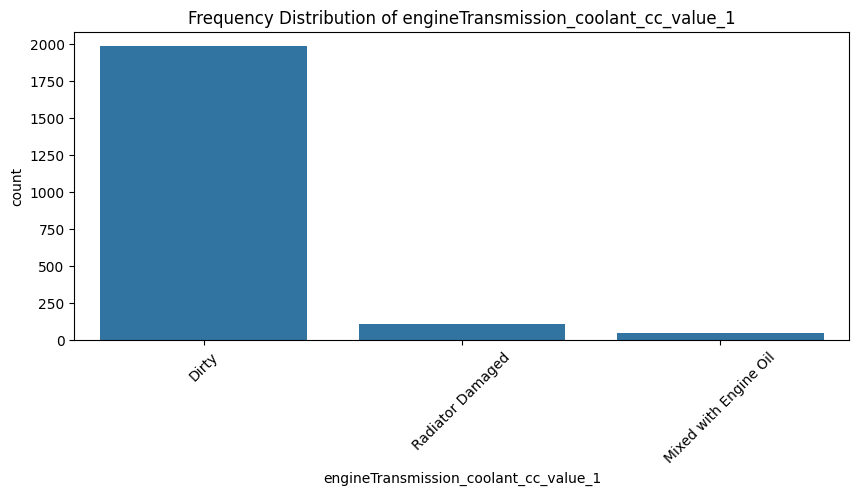

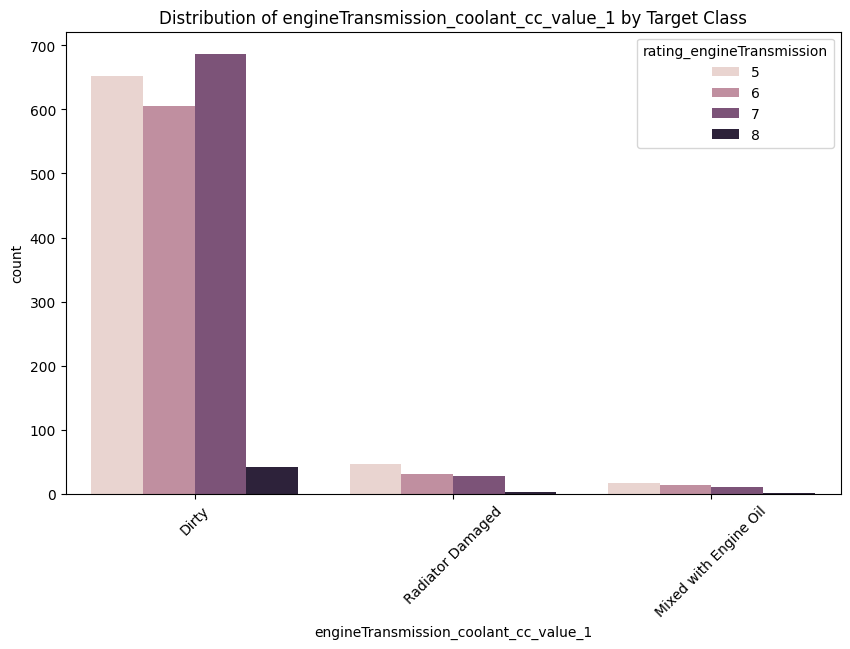

Chi-square test for engineTransmission_coolant_cc_value_1 vs Target:
Chi2 Statistic: 6.893180425026597, P-value: 0.33083896024357934



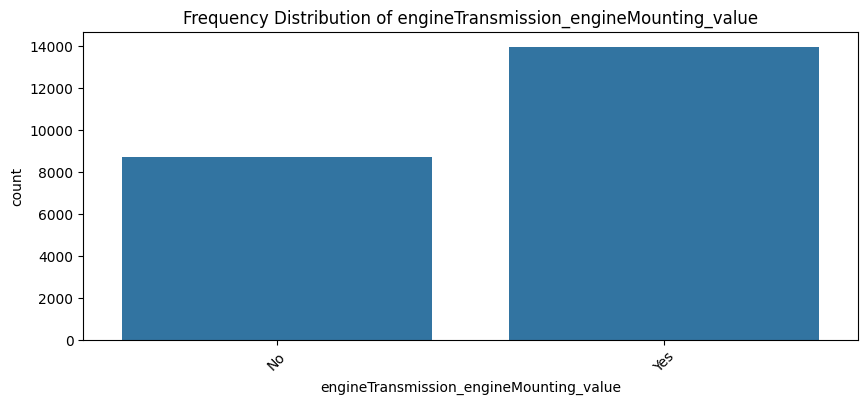

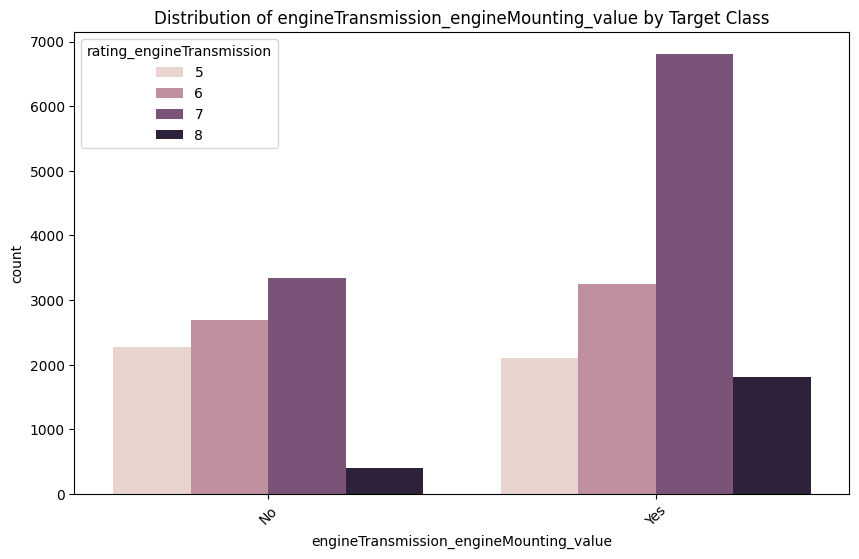

Chi-square test for engineTransmission_engineMounting_value vs Target:
Chi2 Statistic: 987.5912031960287, P-value: 8.85039779336317e-214



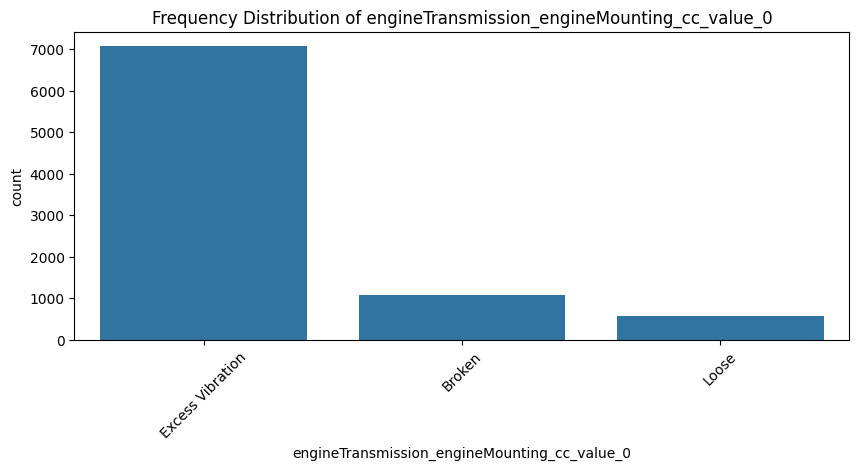

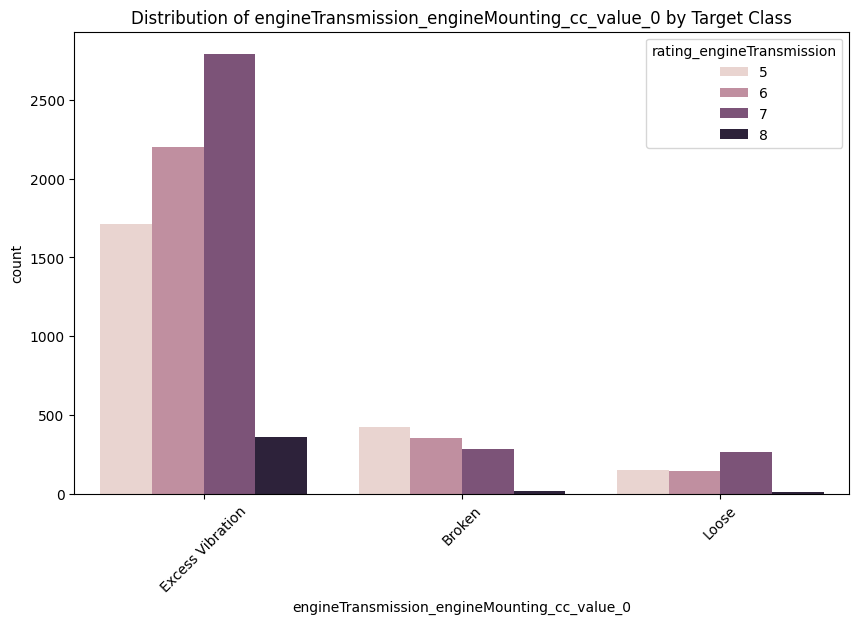

Chi-square test for engineTransmission_engineMounting_cc_value_0 vs Target:
Chi2 Statistic: 168.56944255625555, P-value: 9.044463669487945e-34



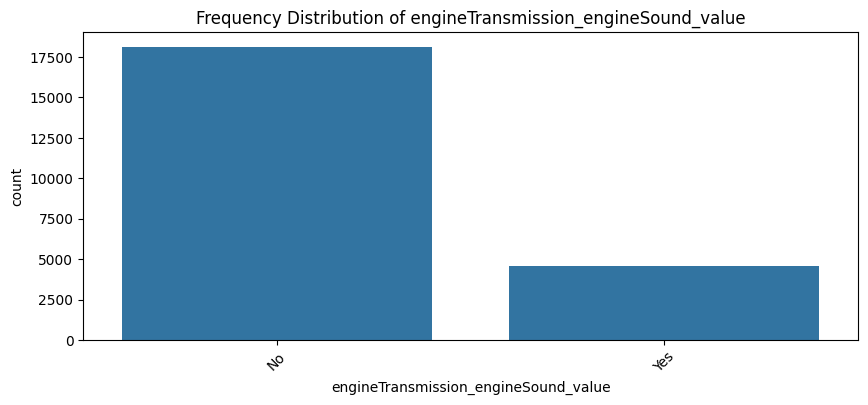

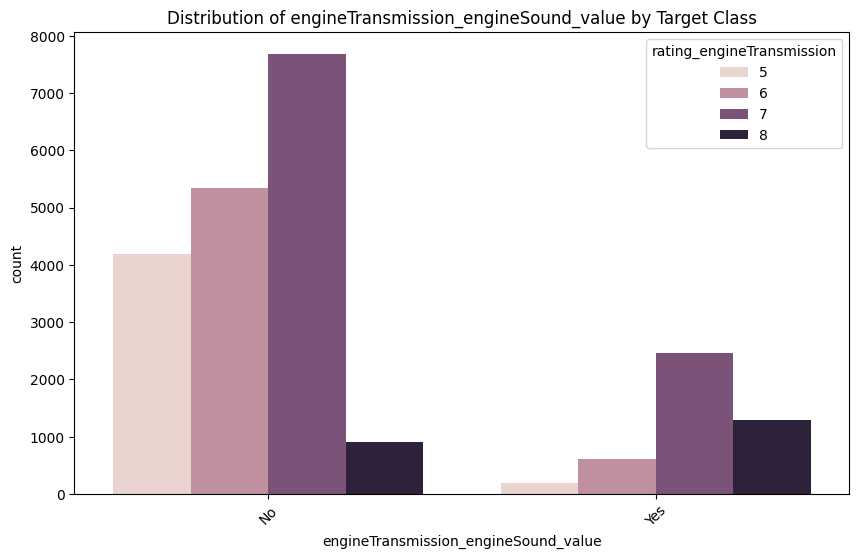

Chi-square test for engineTransmission_engineSound_value vs Target:
Chi2 Statistic: 3211.601669626837, P-value: 0.0



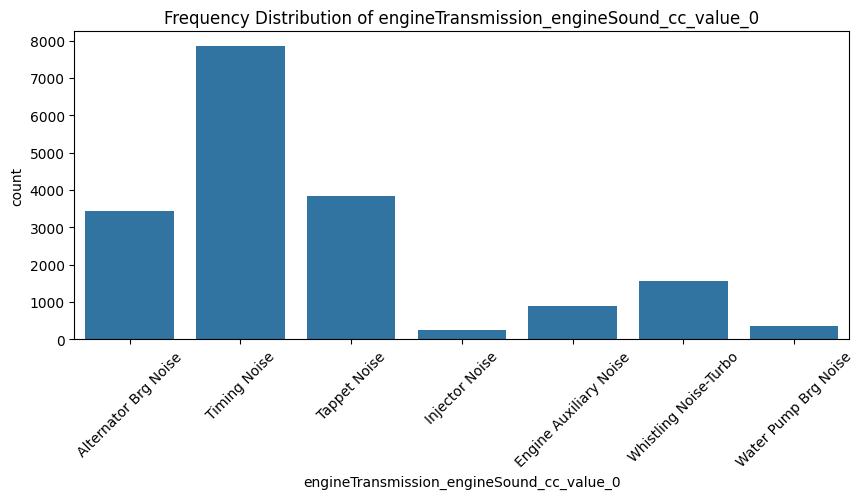

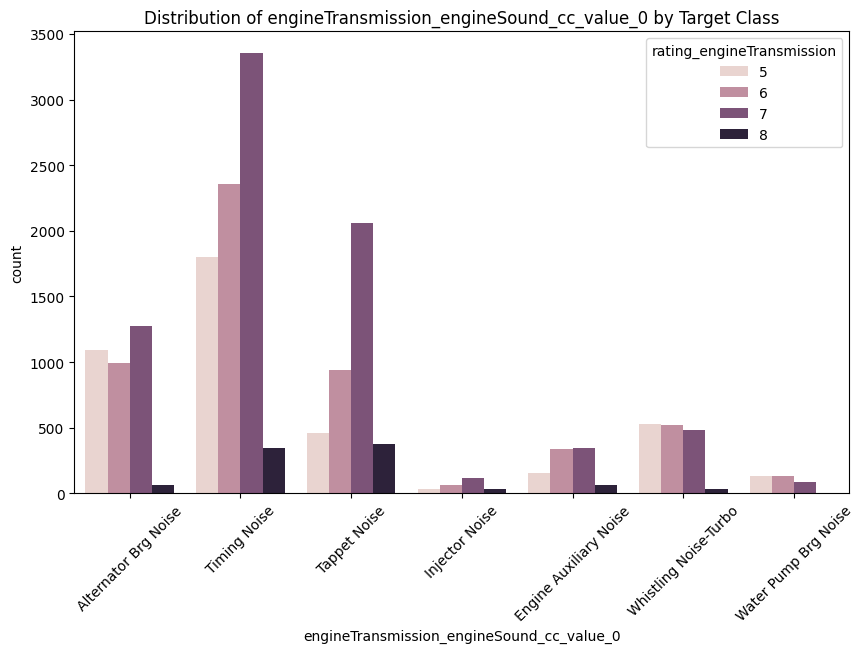

Chi-square test for engineTransmission_engineSound_cc_value_0 vs Target:
Chi2 Statistic: 1054.3354852332548, P-value: 1.7008136458539444e-212



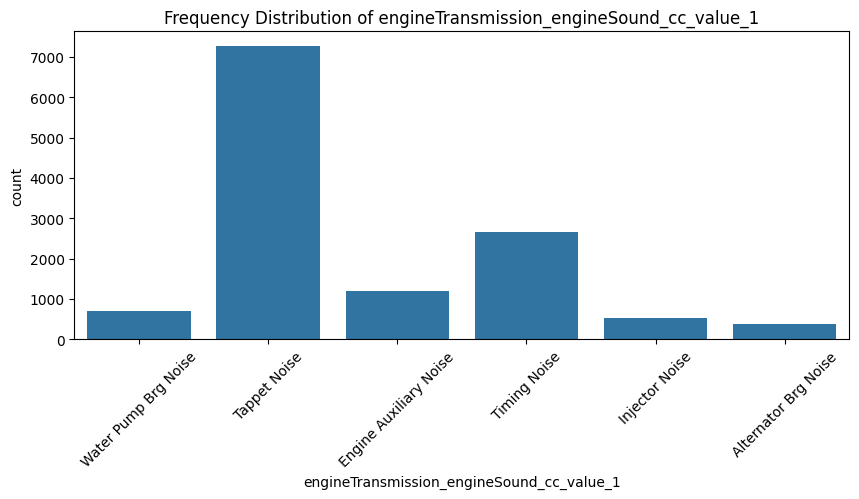

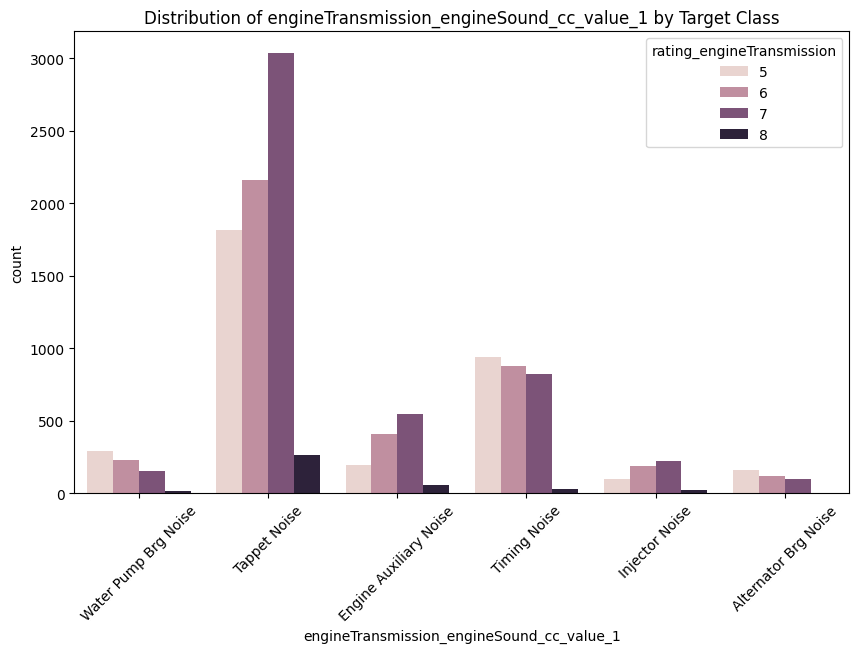

Chi-square test for engineTransmission_engineSound_cc_value_1 vs Target:
Chi2 Statistic: 440.7837741952427, P-value: 1.805503629816671e-84



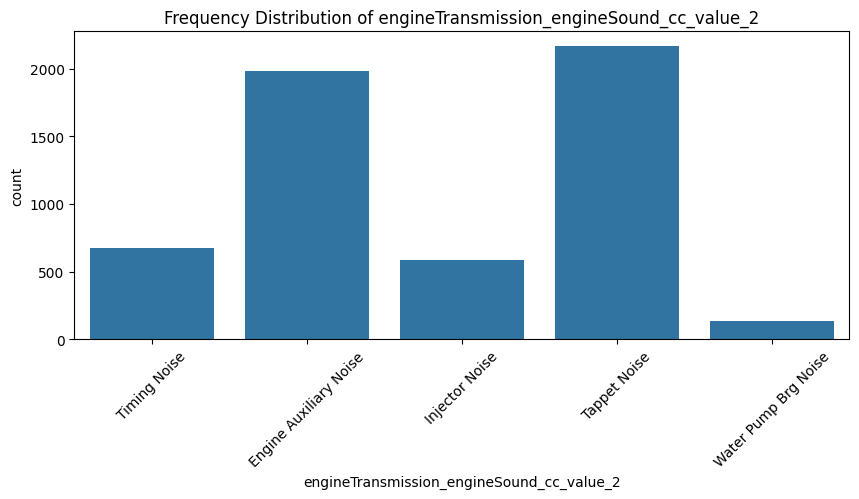

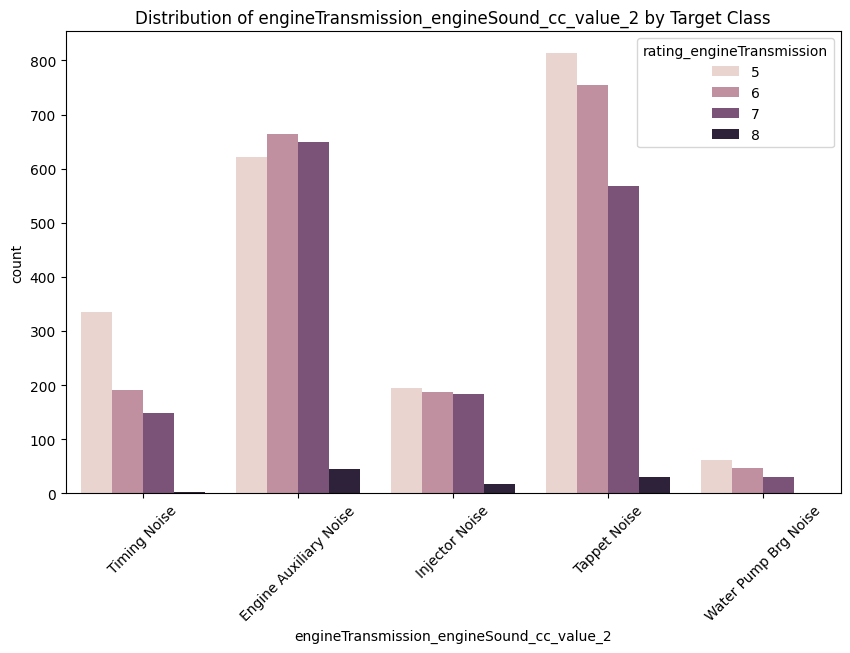

Chi-square test for engineTransmission_engineSound_cc_value_2 vs Target:
Chi2 Statistic: 107.69674665737324, P-value: 1.7064045887005425e-17



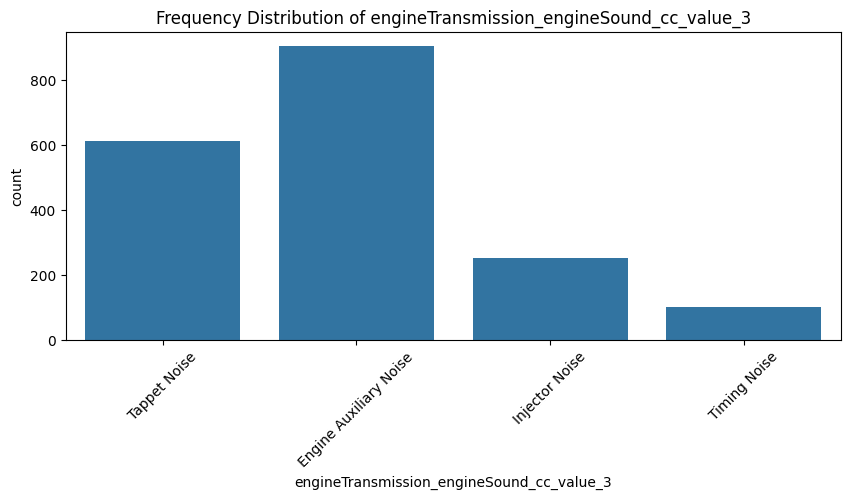

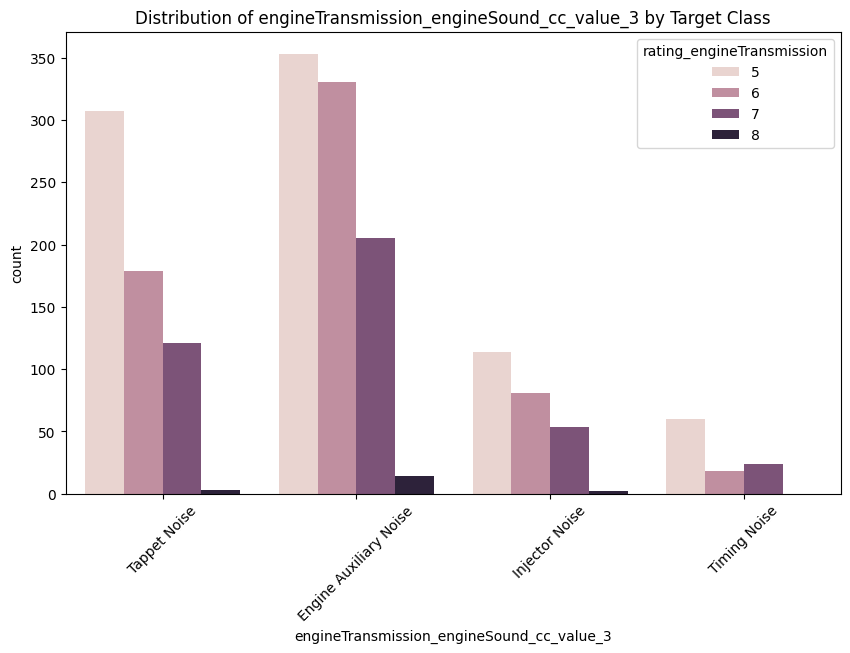

Chi-square test for engineTransmission_engineSound_cc_value_3 vs Target:
Chi2 Statistic: 35.447060770211976, P-value: 4.967774523742392e-05



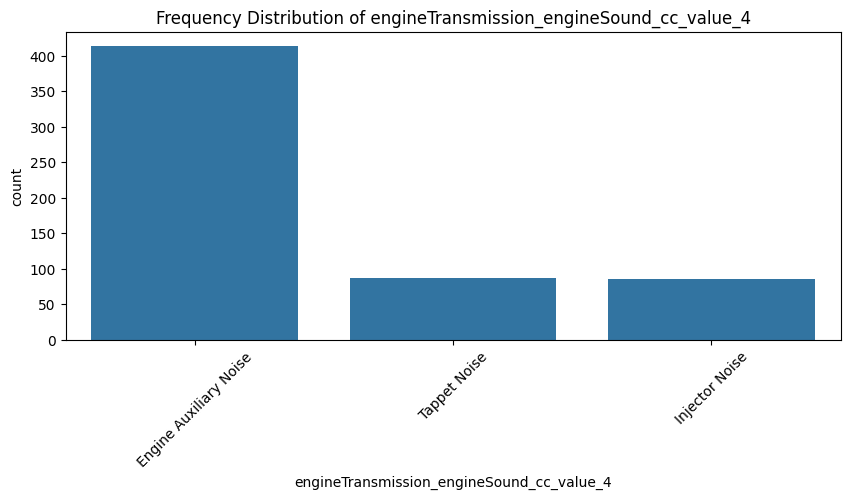

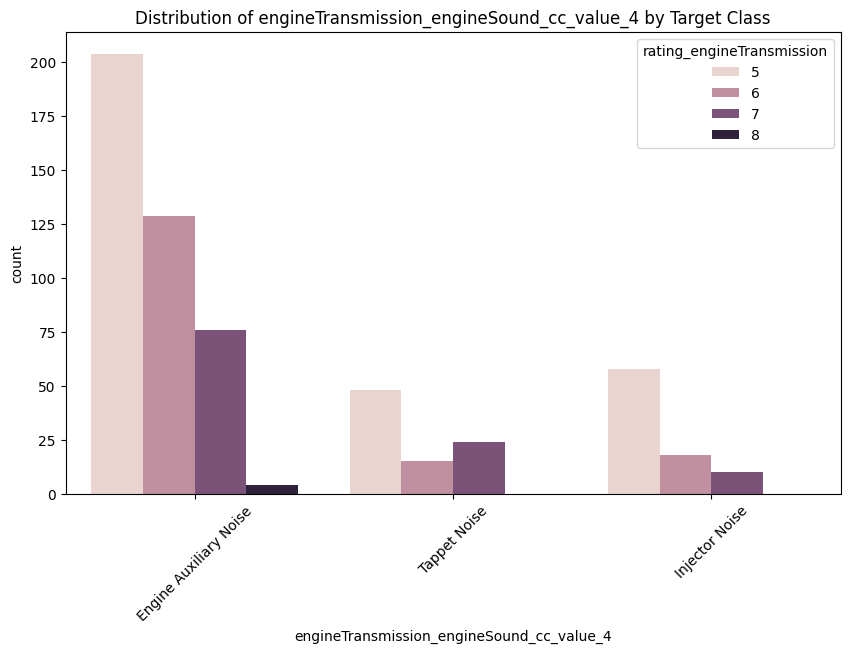

Chi-square test for engineTransmission_engineSound_cc_value_4 vs Target:
Chi2 Statistic: 18.860735653618388, P-value: 0.004405409234124941



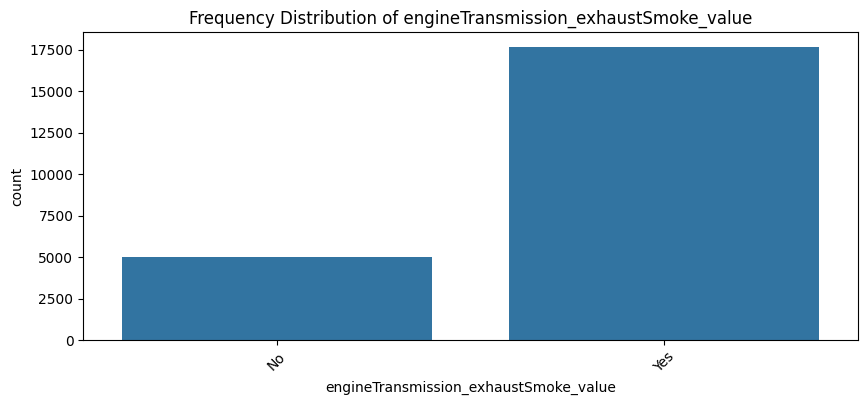

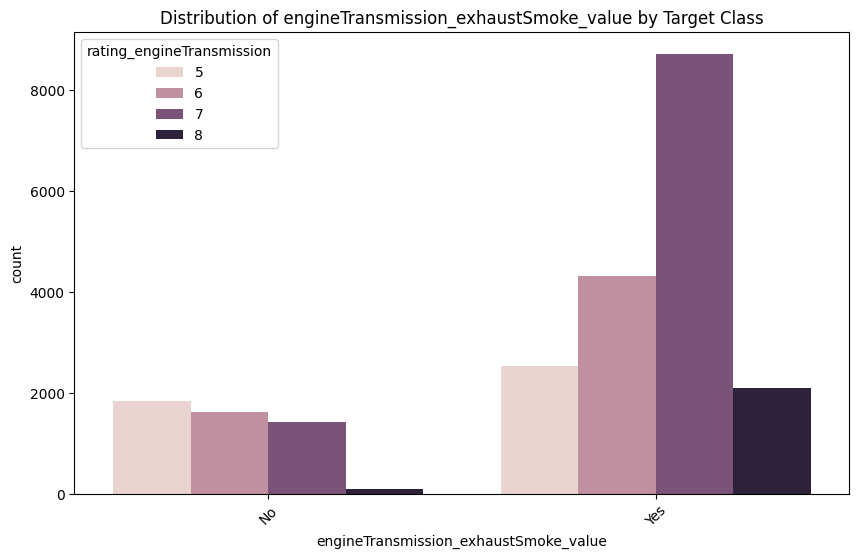

Chi-square test for engineTransmission_exhaustSmoke_value vs Target:
Chi2 Statistic: 1872.9627637262365, P-value: 0.0



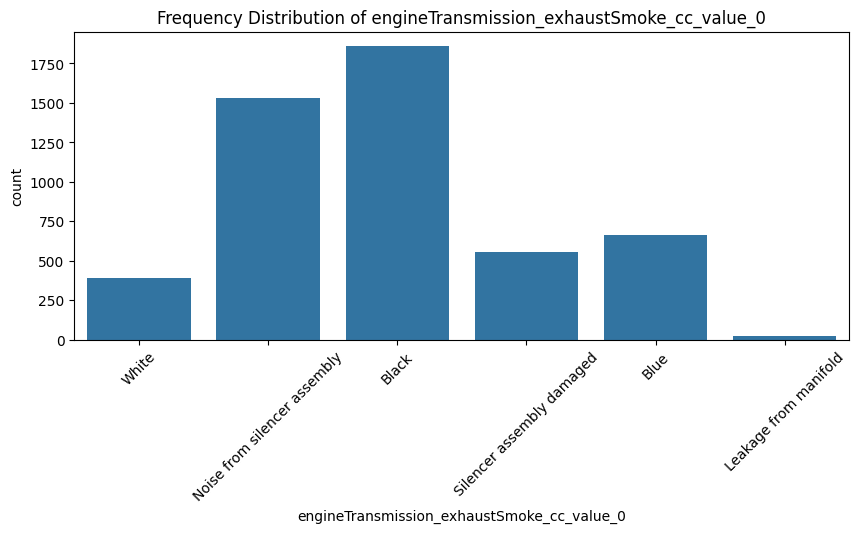

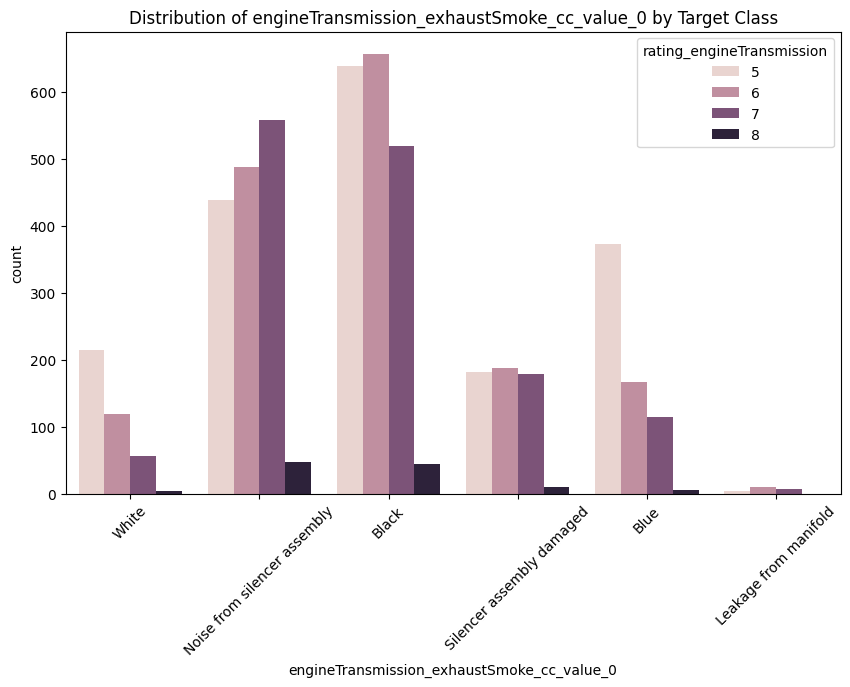

Chi-square test for engineTransmission_exhaustSmoke_cc_value_0 vs Target:
Chi2 Statistic: 264.3660496319825, P-value: 1.3516808821977613e-47



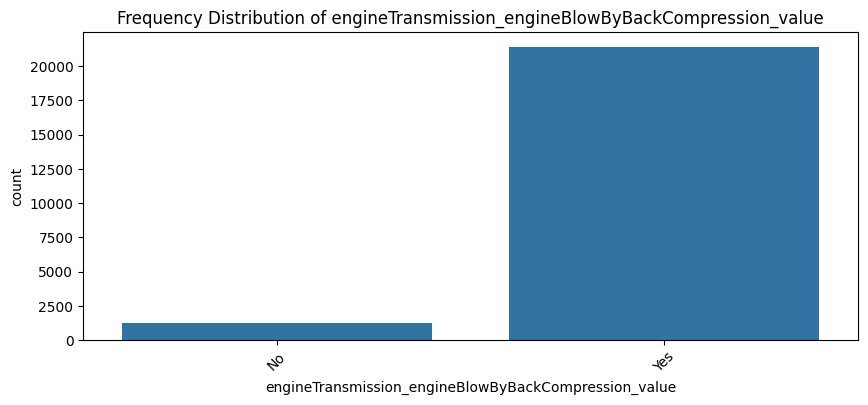

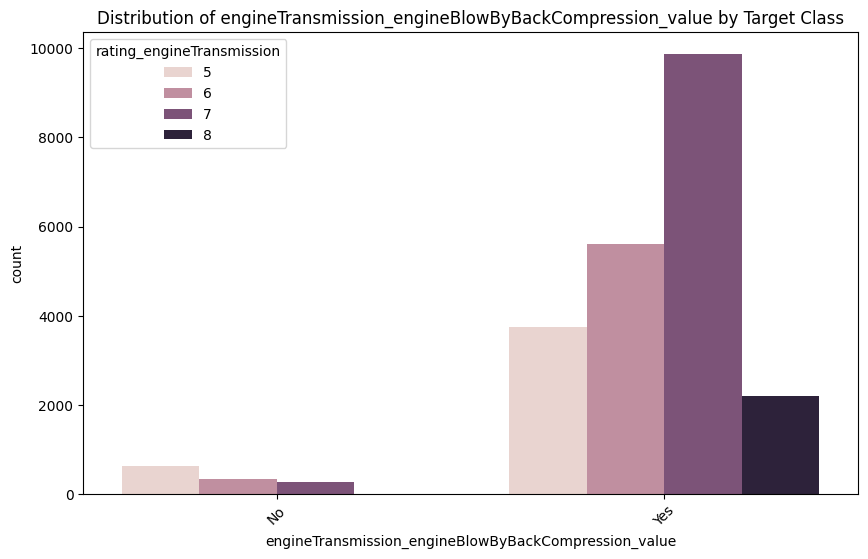

Chi-square test for engineTransmission_engineBlowByBackCompression_value vs Target:
Chi2 Statistic: 886.4056401167252, P-value: 7.865137603835644e-192



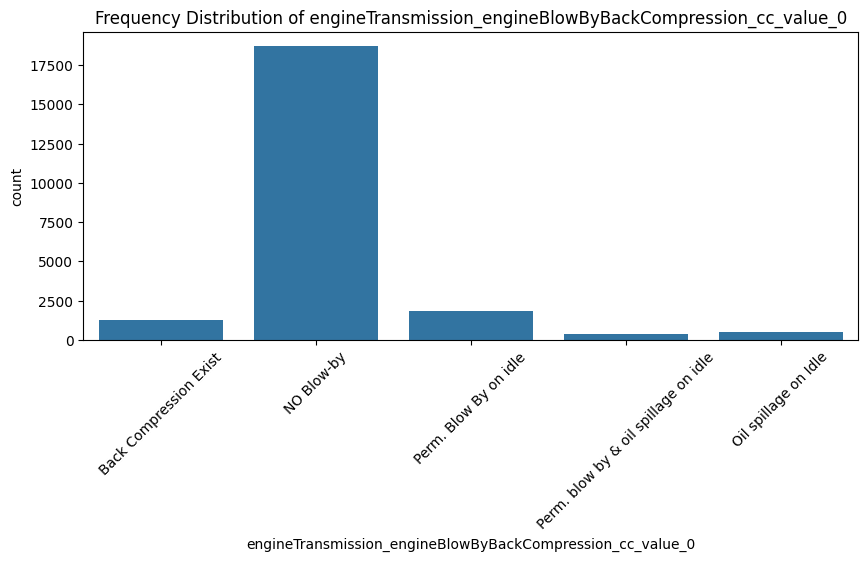

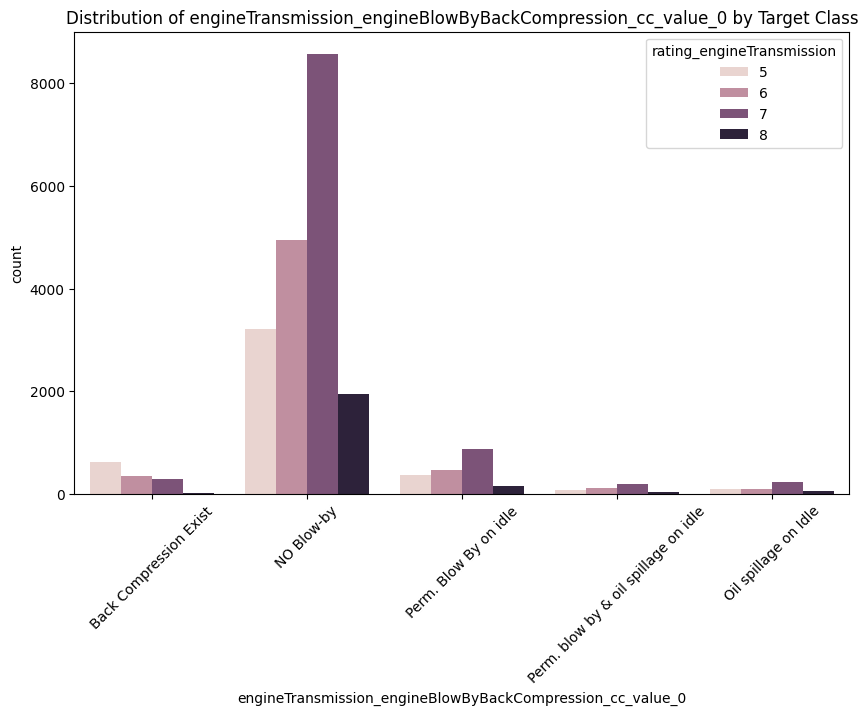

Chi-square test for engineTransmission_engineBlowByBackCompression_cc_value_0 vs Target:
Chi2 Statistic: 920.1224055364866, P-value: 2.7389901274069794e-189



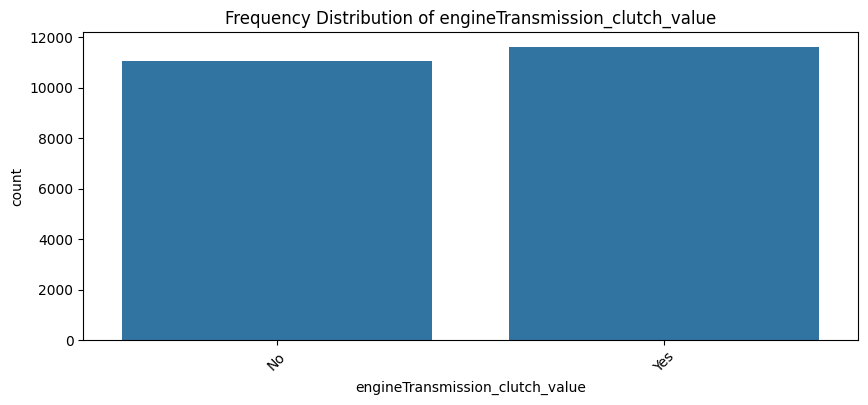

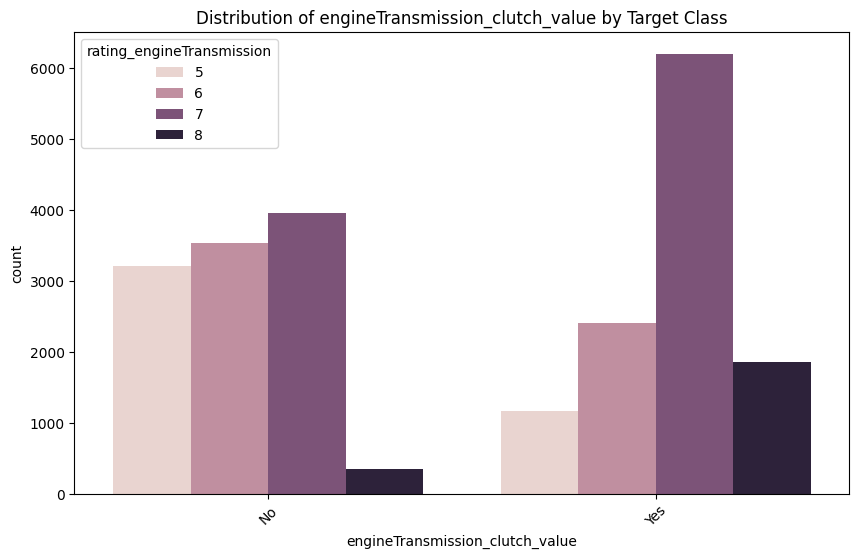

Chi-square test for engineTransmission_clutch_value vs Target:
Chi2 Statistic: 2664.1193490650285, P-value: 0.0



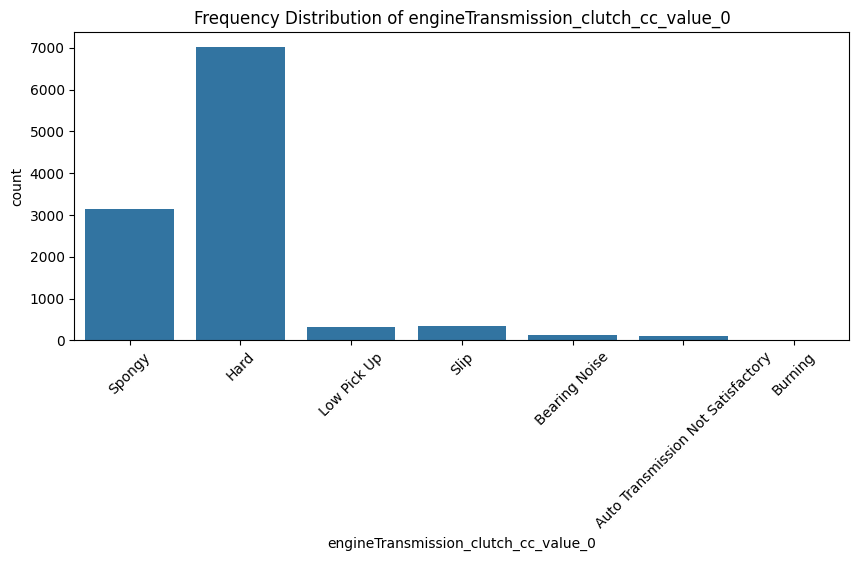

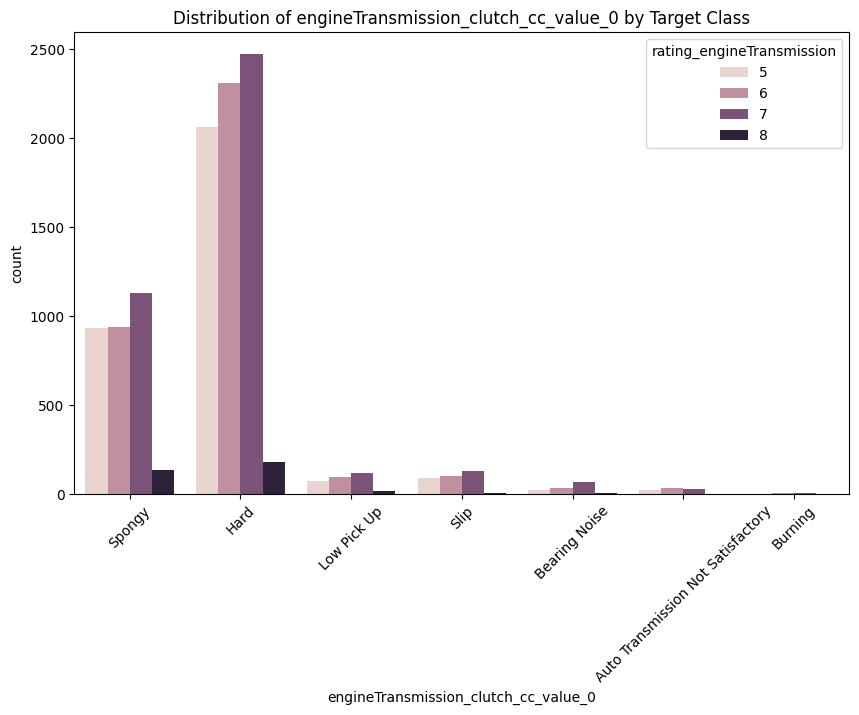

Chi-square test for engineTransmission_clutch_cc_value_0 vs Target:
Chi2 Statistic: 62.7268500073945, P-value: 7.363427042115123e-07



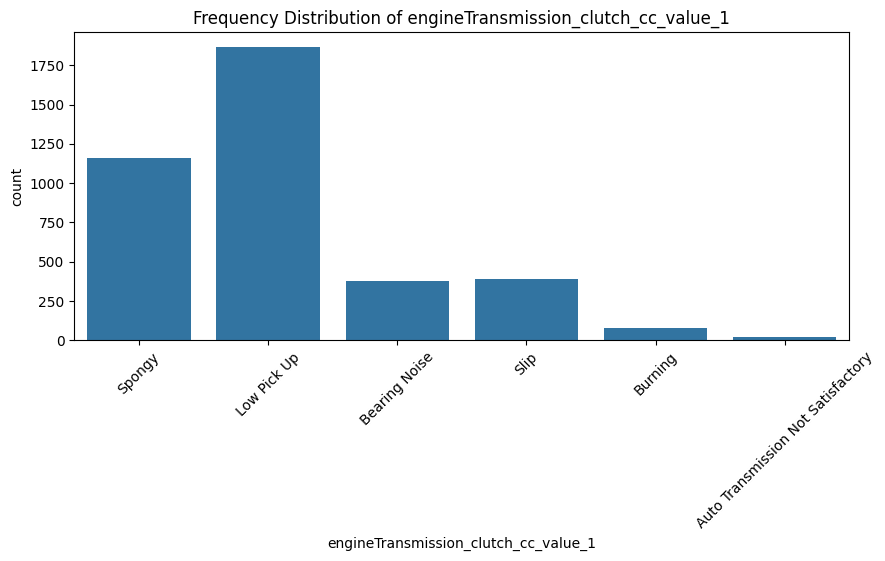

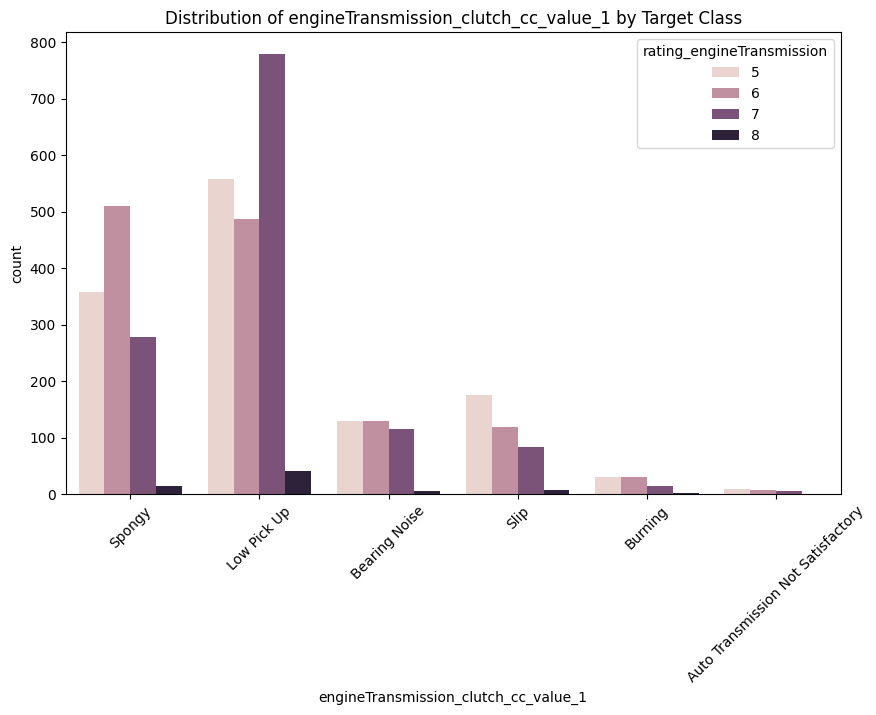

Chi-square test for engineTransmission_clutch_cc_value_1 vs Target:
Chi2 Statistic: 197.1139790591858, P-value: 8.191886503477359e-34



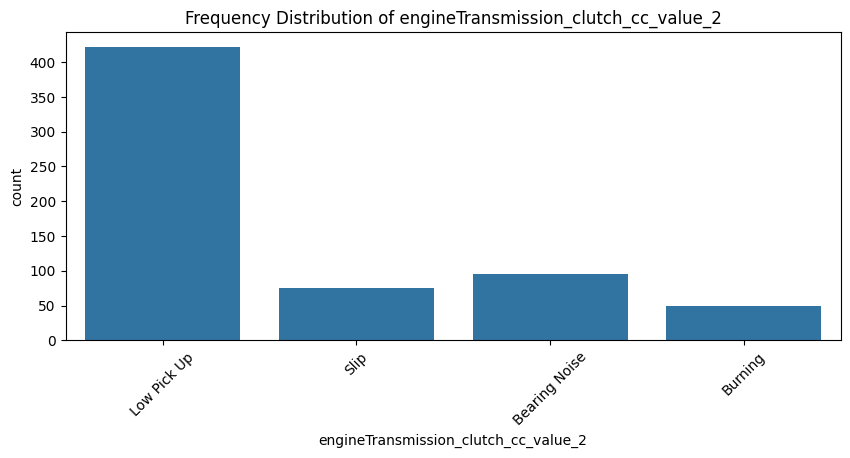

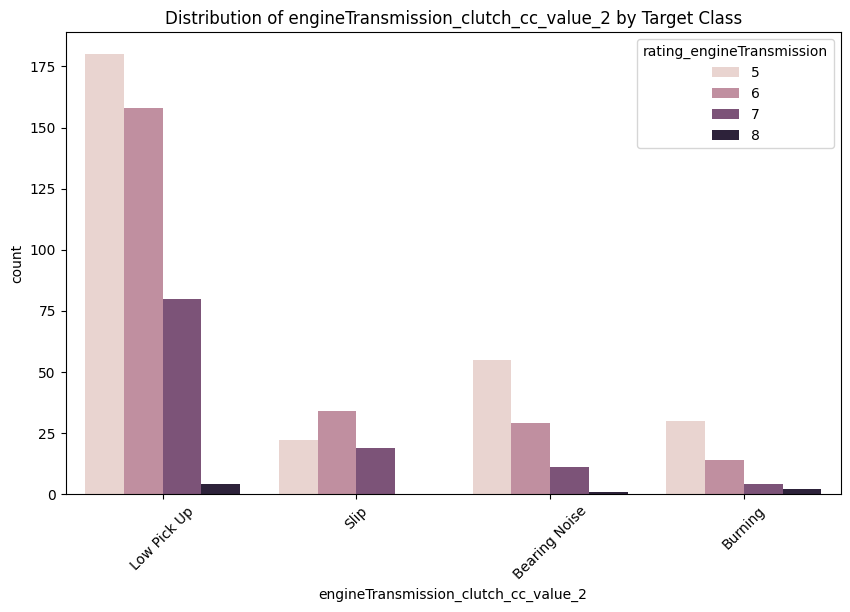

Chi-square test for engineTransmission_clutch_cc_value_2 vs Target:
Chi2 Statistic: 26.51861216614081, P-value: 0.001679452733554866



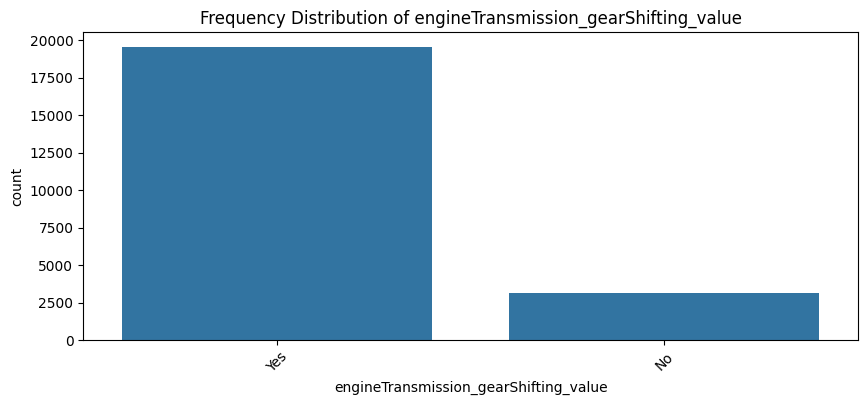

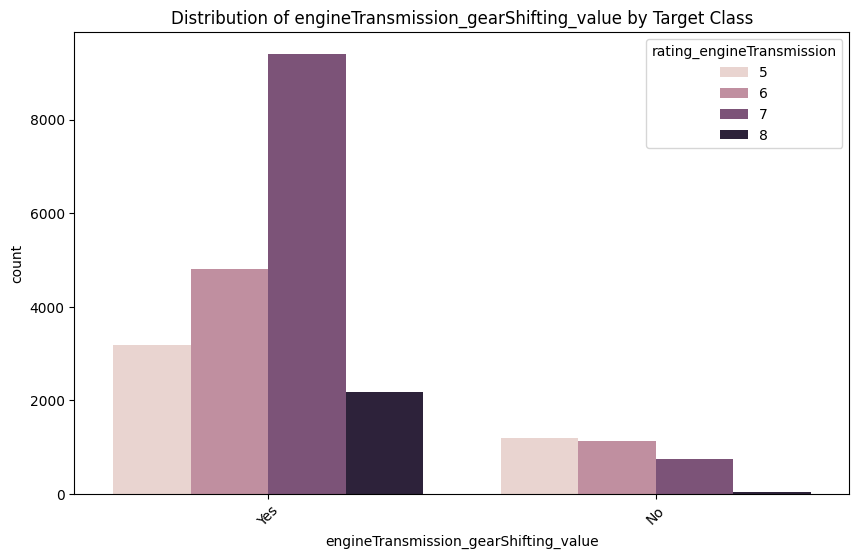

Chi-square test for engineTransmission_gearShifting_value vs Target:
Chi2 Statistic: 1457.0045160344134, P-value: 0.0



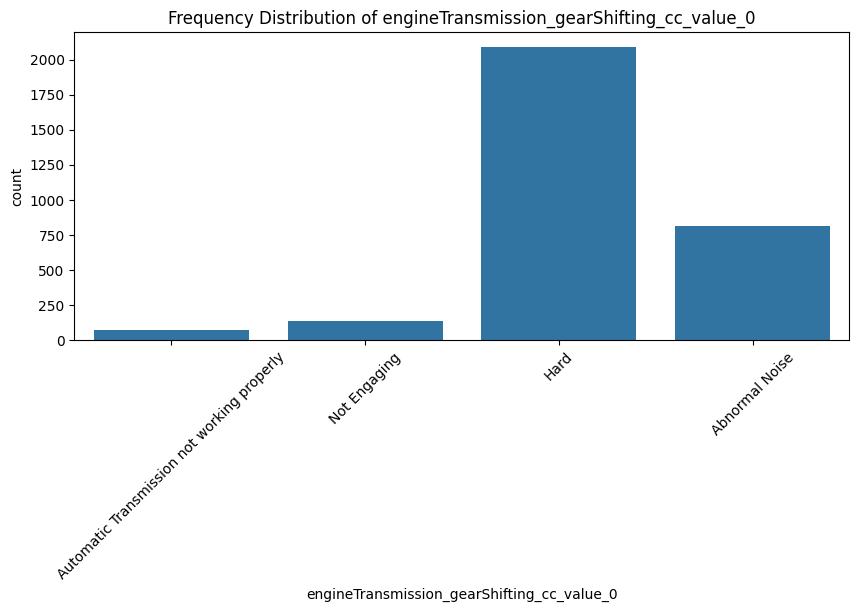

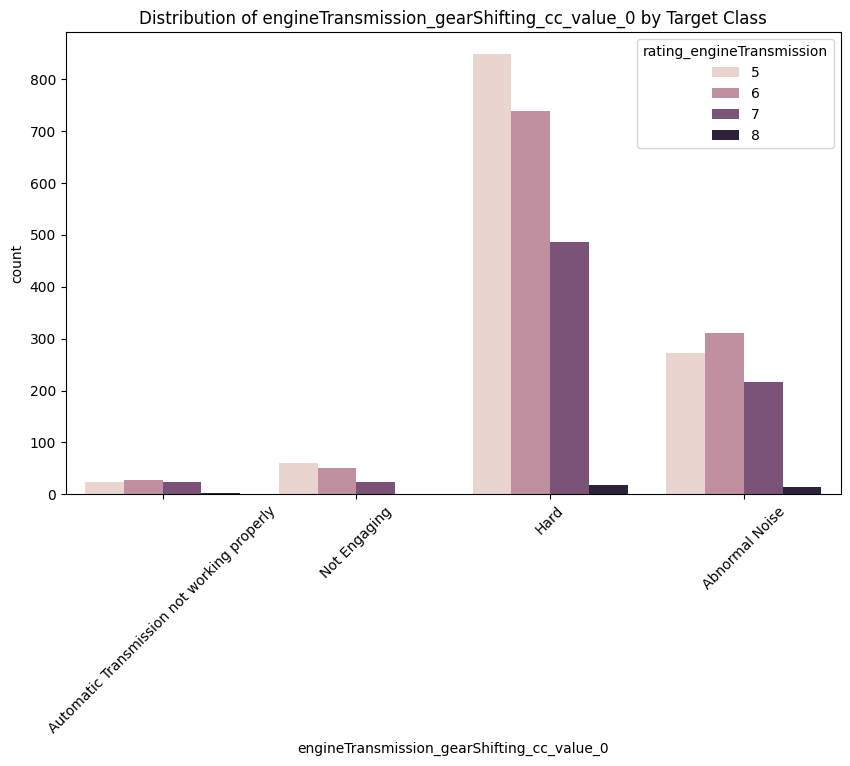

Chi-square test for engineTransmission_gearShifting_cc_value_0 vs Target:
Chi2 Statistic: 24.656817759597505, P-value: 0.003375205983701134



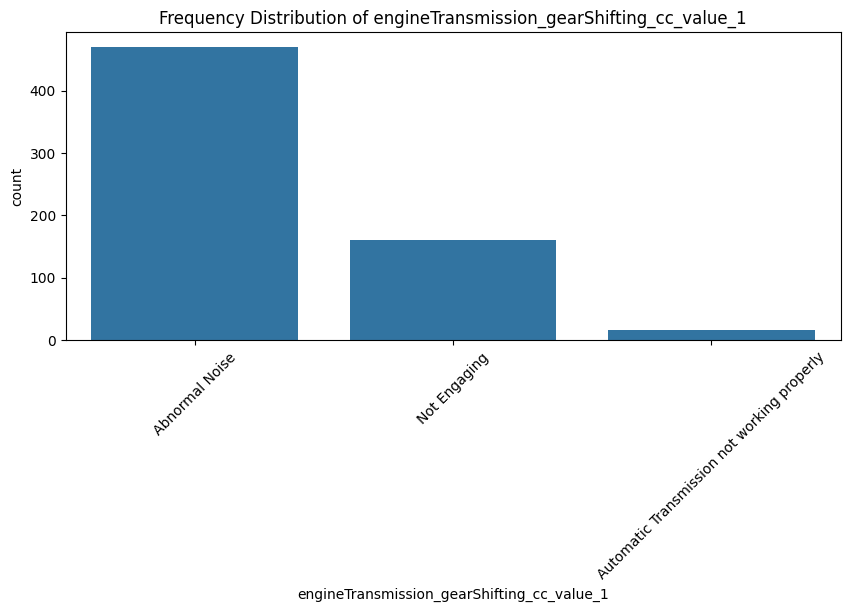

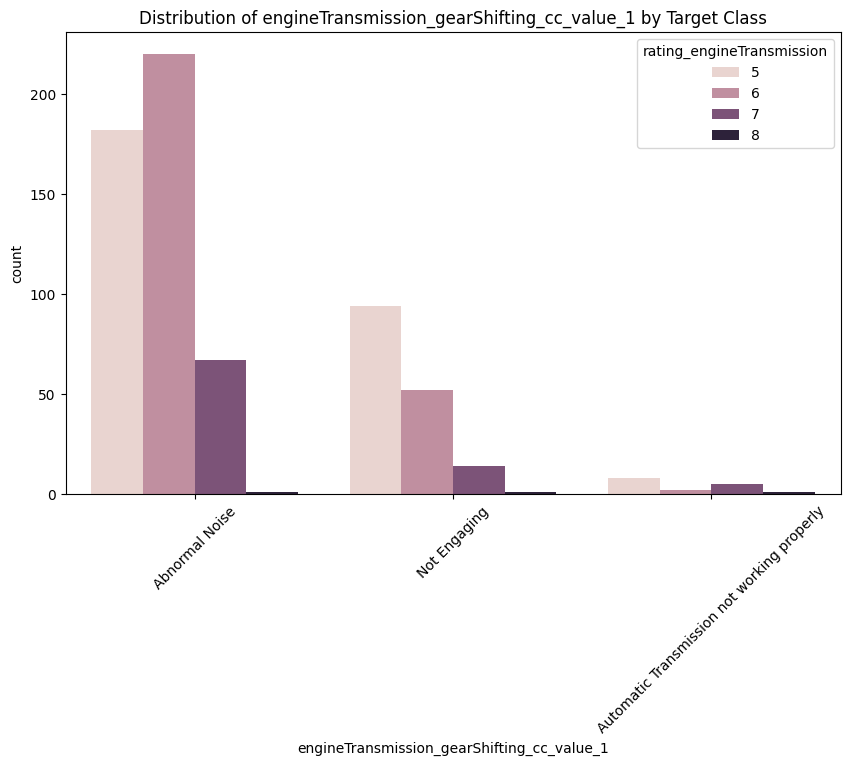

Chi-square test for engineTransmission_gearShifting_cc_value_1 vs Target:
Chi2 Statistic: 39.16097853339636, P-value: 6.655904722829879e-07



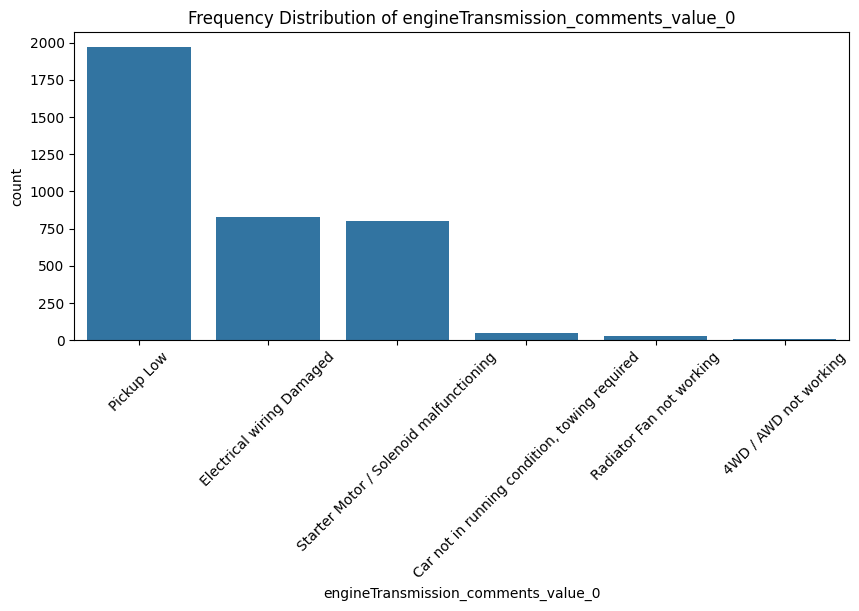

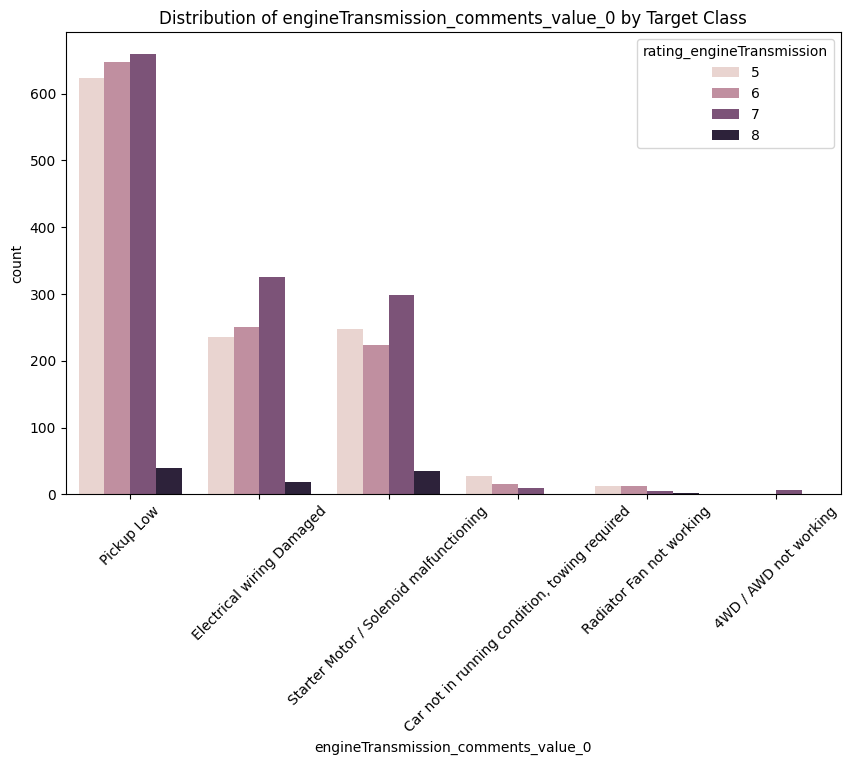

Chi-square test for engineTransmission_comments_value_0 vs Target:
Chi2 Statistic: 54.79249277068065, P-value: 1.935044293880301e-06



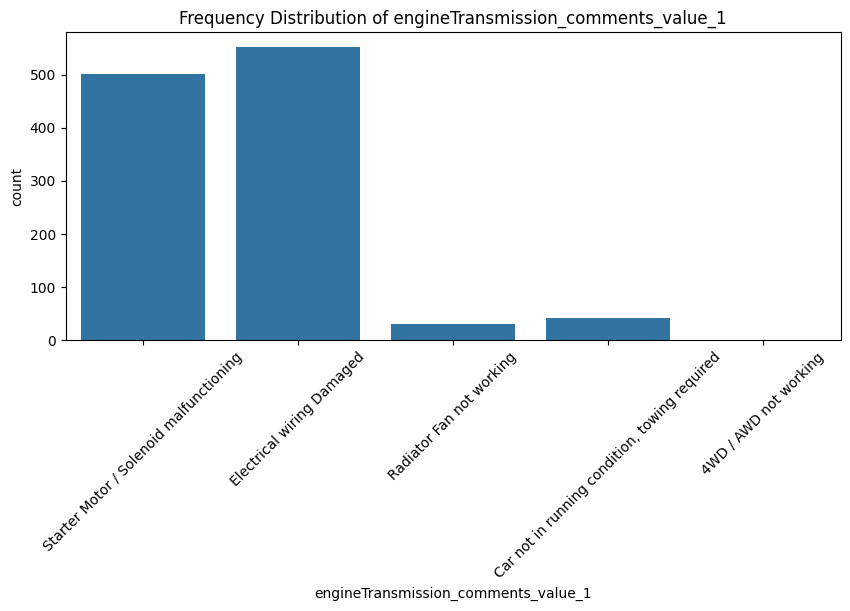

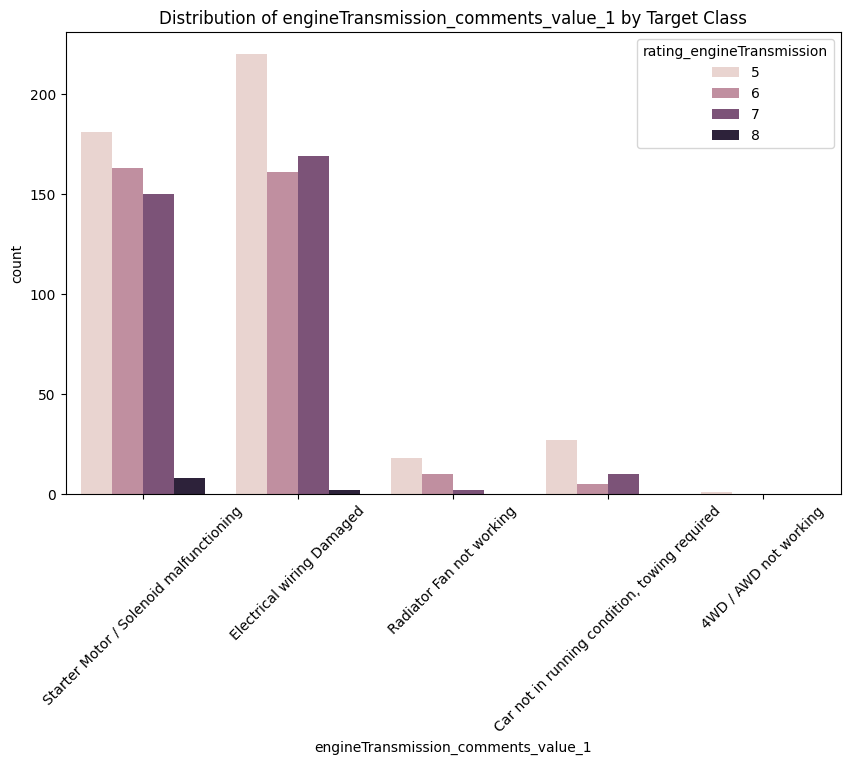

Chi-square test for engineTransmission_comments_value_1 vs Target:
Chi2 Statistic: 29.76548601245901, P-value: 0.0030285093344013603



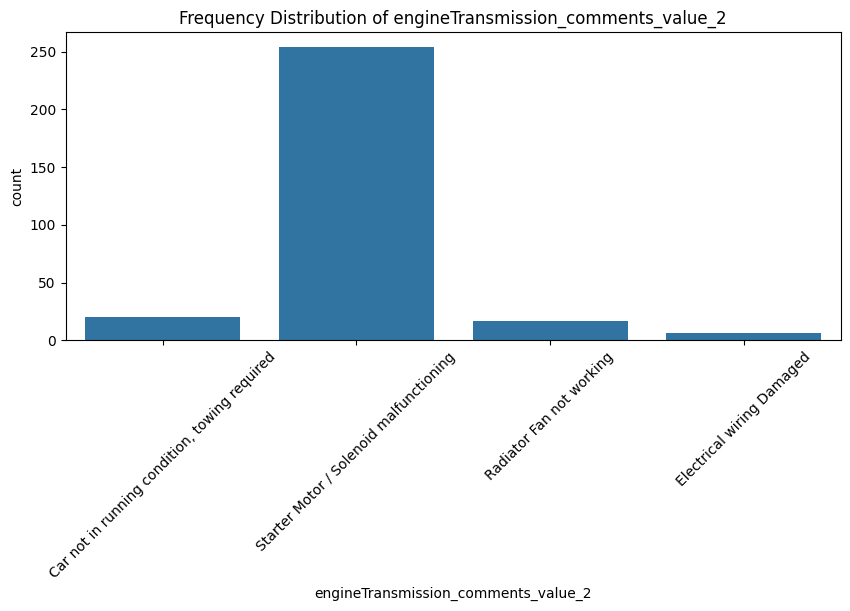

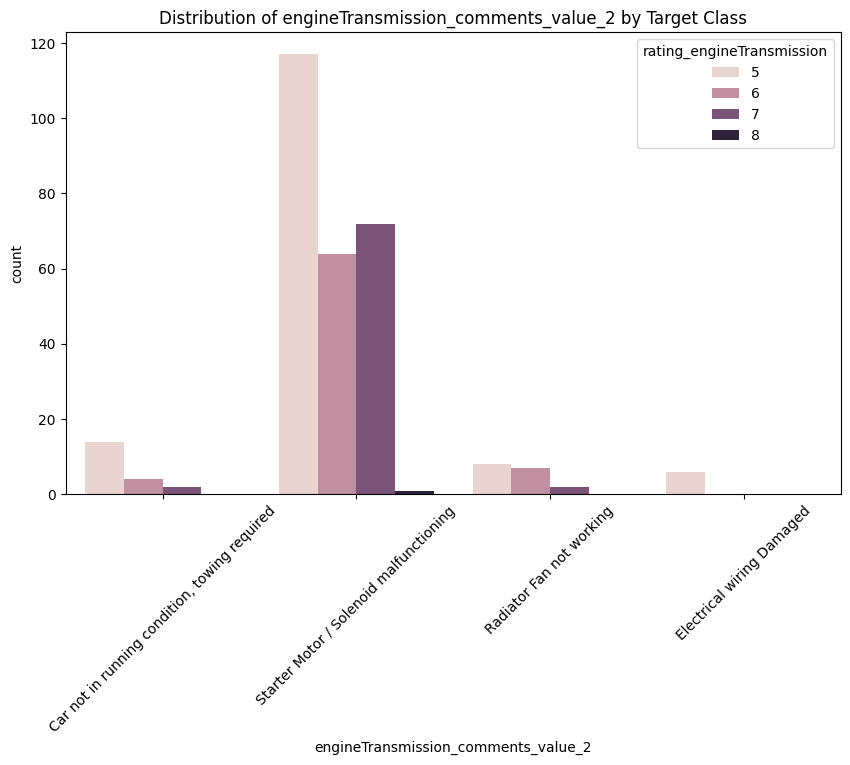

Chi-square test for engineTransmission_comments_value_2 vs Target:
Chi2 Statistic: 14.53244908369052, P-value: 0.10460564149264401



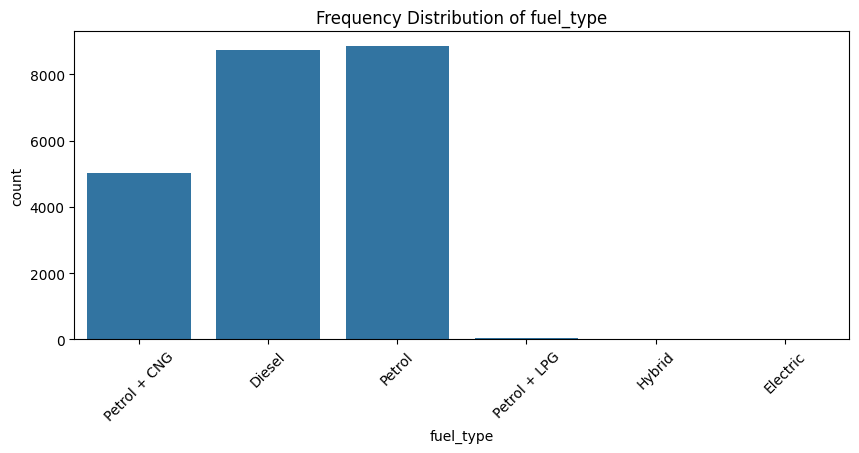

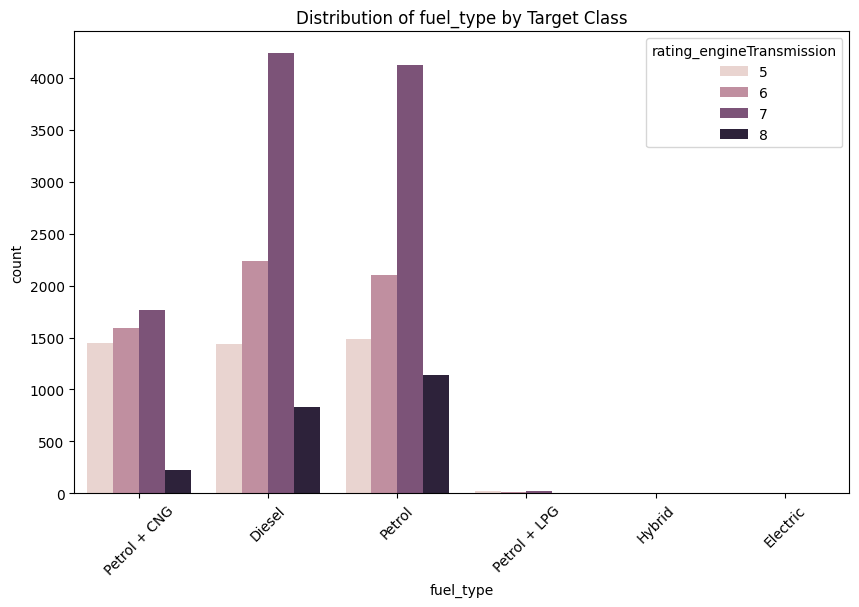

Chi-square test for fuel_type vs Target:
Chi2 Statistic: 791.827887726334, P-value: 4.744626434218492e-159



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    # Frequency distribution of each category
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=data)
    plt.title(f'Frequency Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

    # Cross-tabulation of the category with the target variable if it's categorical
    if 'rating_engineTransmission' in data.columns:  # Assuming 'target' is your categorical target column
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='rating_engineTransmission', data=data)
        plt.title(f'Distribution of {column} by Target Class')
        plt.xticks(rotation=45)
        plt.show()

    # Chi-square test for independence between categorical feature and target variable
    if 'rating_engineTransmission' in data.columns:
        from scipy.stats import chi2_contingency
        contingency_table = pd.crosstab(data[column], data['rating_engineTransmission'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square test for {column} vs Target:\nChi2 Statistic: {chi2}, P-value: {p}\n")

    # Boxplot for each categorical variable against a numeric variable
    # Assuming there is a numeric variable 'numeric_var' in your DataFrame
    if 'numeric_var' in data.columns:  # Check if the numeric column exists
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=column, y='numeric_var', data=data)
        plt.title(f'Impact of {column} on Numeric Variable')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
for column in data.columns:
    if data[column].dtype == "object":
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].median())

# data.drop(['inspectionStartTime'], axis=1, inplace=True)



# Convert categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store label encoder for possible inverse transform

# Standardizing the data, excluding the target variable
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(['rating_engineTransmission'], axis=1))
y = data['rating_engineTransmission']


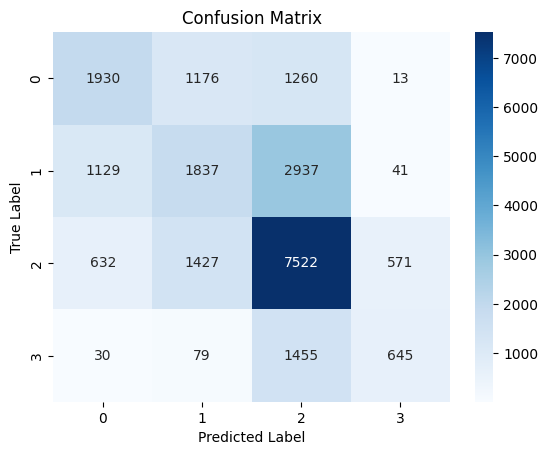

              precision    recall  f1-score   support

           5       0.52      0.44      0.48      4379
           6       0.41      0.31      0.35      5944
           7       0.57      0.74      0.64     10152
           8       0.51      0.29      0.37      2209

    accuracy                           0.53     22684
   macro avg       0.50      0.45      0.46     22684
weighted avg       0.51      0.53      0.51     22684

Original data size: 22684
Filtered data size (without mislabels): 11934
Removed mislabeled cases: 10750


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame and 'target' is the name of the target column

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Stratified K-Fold ensures that each fold reflects the overall distribution of the target classes
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Predict labels using cross-validation
predicted = cross_val_predict(clf, X, y, cv=skf)

# Generate a confusion matrix
cm = confusion_matrix(y, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate a classification report
report = classification_report(y, predicted)
print(report)

# Filter out potentially mislabeled data points
data['predicted'] = predicted  # Temporarily add predictions to the dataset for filtering
filtered_data = data[data['rating_engineTransmission'] == data['predicted']]  # Keep only rows where predictions match the labels
filtered_data.drop('predicted', axis=1, inplace=True)  # Remove the temporary predictions column
# Show results
print("Original data size:", len(data))
print("Filtered data size (without mislabels):", len(filtered_data))
print("Removed mislabeled cases:", len(data) - len(filtered_data))

# Optionally, use filtered_data for further analysis or modeling


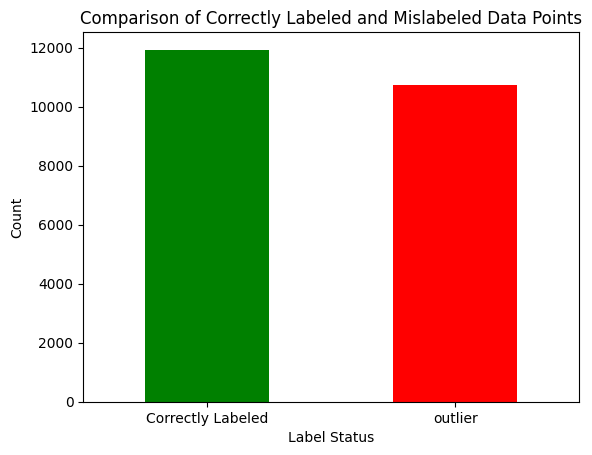

In [ ]:
# # Optional: Visualize the results
# plt.figure(figsize=(10, 6))
# sns.countplot(x='outlier', data=data)
# plt.title('Outlier Counts')
# plt.show()
data['outlier'] = data['rating_engineTransmission'] != data['predicted']

# Count the number of mislabeled vs correctly labeled points
label_counts = data['outlier'].value_counts().rename(index={False: 'Correctly Labeled', True: 'outlier'})

# Create a bar chart
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Comparison of Correctly Labeled and Mislabeled Data Points')
plt.xlabel('Label Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the labels horizontal for readability
plt.show()

In [ ]:
data

year  month  engineTransmission_battery_value  \
0      2008      8                                 0   
1      2007      5                                 1   
2      2012      5                                 1   
3      2013      1                                 1   
4      2011      7                                 1   
...     ...    ...                               ...   
26302  2013      3                                 1   
26303  2007      8                                 0   
26304  2004      7                                 1   
26305  2010     12                                 1   
26306  2015     11                                 1   

       engineTransmission_battery_cc_value_0  \
0                                          4   
1                                          4   
2                                          4   
3                                          4   
4                                          4   
...                                      ...   
26302                                      4   
26303                                      4   
26304                                      4   
26305                                      4   
26306                                      4   

       engineTransmission_battery_cc_value_1  \
0                                          2   
1                                          2   
2                                          2   
3                                          2   
4                                          2   
...                                      ...   
26302                                      2   
26303                                      2   
26304                                      2   
26305                                      2   
26306                                      2   

       engineTransmission_engineoilLevelDipstick_value  \
0                                                    1   
1                                                    1   
2                                                    1   
3                                                    1   
4                                                    1   
...                                                ...   
26302                                                1   
26303                                                0   
26304                                                1   
26305                                                1   
26306                                                1   

       engineTransmission_engineOilLevelDipstick_cc_value_0  \
0                                                      0      
1                                                      0      
2                                                      0      
3                                                      0      
4                                                      0      
...                                                  ...      
26302                                                  0      
26303                                                  0      
26304                                                  0      
26305                                                  0      
26306                                                  0      

       engineTransmission_engineOil  engineTransmission_engineOil_cc_value_0  \
0                                 0                                        5   
1                                 0                                        5   
2                                 0                                        0   
3                                 0                                        0   
4                                 0                                        5   
...                             ...                                      ...   
26302                             0                                        5   
26303                             0                                        0   
26304 

In [ ]:

outliers = data[data['outlier'] == True]  # -1 indicates an outlier

# Display outliers
outliers


year  month  engineTransmission_battery_value  \
1      2007      5                                 1   
3      2013      1                                 1   
4      2011      7                                 1   
5      2011     11                                 1   
6      2012      3                                 1   
...     ...    ...                               ...   
26302  2013      3                                 1   
26303  2007      8                                 0   
26304  2004      7                                 1   
26305  2010     12                                 1   
26306  2015     11                                 1   

       engineTransmission_battery_cc_value_0  \
1                                          4   
3                                          4   
4                                          4   
5                                          4   
6                                          4   
...                                      ...   
26302                                      4   
26303                                      4   
26304                                      4   
26305                                      4   
26306                                      4   

       engineTransmission_battery_cc_value_1  \
1                                          2   
3                                          2   
4                                          2   
5                                          2   
6                                          2   
...                                      ...   
26302                                      2   
26303                                      2   
26304                                      2   
26305                                      2   
26306                                      2   

       engineTransmission_engineoilLevelDipstick_value  \
1                                                    1   
3                                                    1   
4                                                    1   
5                                                    1   
6                                                    1   
...                                                ...   
26302                                                1   
26303                                                0   
26304                                                1   
26305                                                1   
26306                                                1   

       engineTransmission_engineOilLevelDipstick_cc_value_0  \
1                                                      0      
3                                                      0      
4                                                      0      
5                                                      0      
6                                                      0      
...                                                  ...      
26302                                                  0      
26303                                                  0      
26304                                                  0      
26305                                                  0      
26306                                                  0      

       engineTransmission_engineOil  engineTransmission_engineOil_cc_value_0  \
1                                 0                                        5   
3                                 0                                        0   
4                                 0                                        5   
5                                 1                                        5   
6                                 0                                        0   
...                             ...                                      ...   
26302                             0                                        5   
26303                             0                                        0   
26304 

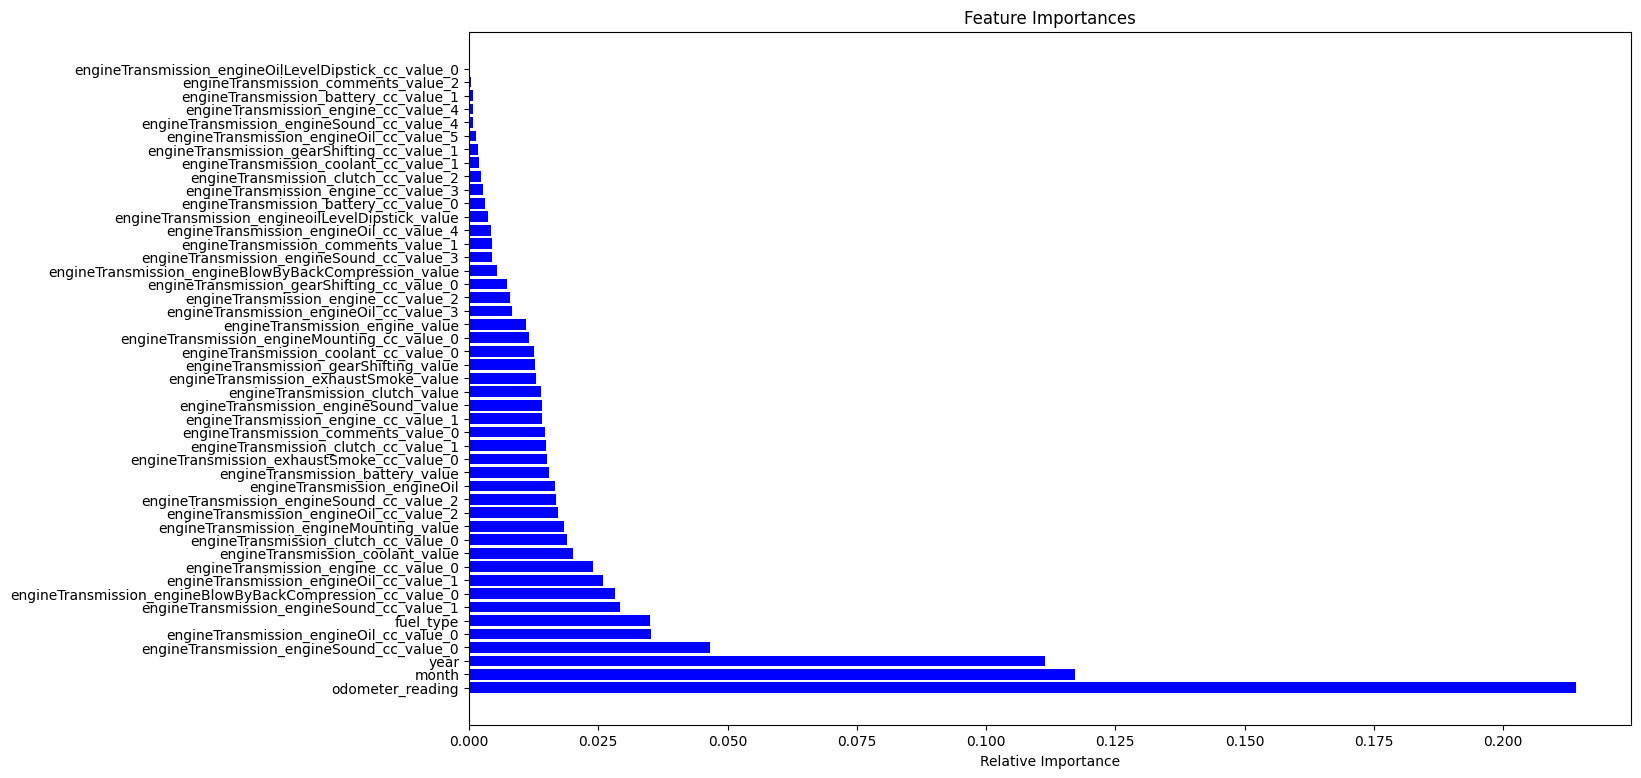

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Use labels from Isolation Forest to create a binary target
outlier_labels = data['outlier'].astype(int)  # Convert -1 to 1 for outliers, 0 for inliers

# Train a Random Forest to estimate feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, outlier_labels)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
features = data.drop(['rating_engineTransmission', 'outlier'], axis=1).columns

# Plot the feature importances
plt.figure(figsize=(15, 9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# data = data[data['outlier']!=-1]
# data.drop(columns=["outlier"], inplace=True)
data

year  month  engineTransmission_battery_value  \
0      2008      8                                 0   
1      2007      5                                 1   
2      2012      5                                 1   
3      2013      1                                 1   
4      2011      7                                 1   
...     ...    ...                               ...   
26302  2013      3                                 1   
26303  2007      8                                 0   
26304  2004      7                                 1   
26305  2010     12                                 1   
26306  2015     11                                 1   

       engineTransmission_battery_cc_value_0  \
0                                          4   
1                                          4   
2                                          4   
3                                          4   
4                                          4   
...                                      ...   
26302                                      4   
26303                                      4   
26304                                      4   
26305                                      4   
26306                                      4   

       engineTransmission_battery_cc_value_1  \
0                                          2   
1                                          2   
2                                          2   
3                                          2   
4                                          2   
...                                      ...   
26302                                      2   
26303                                      2   
26304                                      2   
26305                                      2   
26306                                      2   

       engineTransmission_engineoilLevelDipstick_value  \
0                                                    1   
1                                                    1   
2                                                    1   
3                                                    1   
4                                                    1   
...                                                ...   
26302                                                1   
26303                                                0   
26304                                                1   
26305                                                1   
26306                                                1   

       engineTransmission_engineOilLevelDipstick_cc_value_0  \
0                                                      0      
1                                                      0      
2                                                      0      
3                                                      0      
4                                                      0      
...                                                  ...      
26302                                                  0      
26303                                                  0      
26304                                                  0      
26305                                                  0      
26306                                                  0      

       engineTransmission_engineOil  engineTransmission_engineOil_cc_value_0  \
0                                 0                                        5   
1                                 0                                        5   
2                                 0                                        0   
3                                 0                                        0   
4                                 0                                        5   
...                             ...                                      ...   
26302                             0                                        5   
26303                             0                                        0   
26304 

In [ ]:
# filtered_data.drop(columns=["outlier"], inplace=True)
data = filtered_data
data

year  month  engineTransmission_battery_value  \
0      2008      8                                 0   
2      2012      5                                 1   
7      2016      2                                 0   
8      2007      4                                 1   
9      2011      2                                 1   
...     ...    ...                               ...   
26292  2013      2                                 1   
26294  2007      1                                 1   
26295  2010     10                                 1   
26299  2007      3                                 1   
26300  2012      4                                 1   

       engineTransmission_battery_cc_value_0  \
0                                          4   
2                                          4   
7                                          4   
8                                          4   
9                                          4   
...                                      ...   
26292                                      4   
26294                                      4   
26295                                      4   
26299                                      4   
26300                                      4   

       engineTransmission_battery_cc_value_1  \
0                                          2   
2                                          2   
7                                          2   
8                                          2   
9                                          2   
...                                      ...   
26292                                      2   
26294                                      2   
26295                                      2   
26299                                      2   
26300                                      2   

       engineTransmission_engineoilLevelDipstick_value  \
0                                                    1   
2                                                    1   
7                                                    1   
8                                                    1   
9                                                    1   
...                                                ...   
26292                                                1   
26294                                                1   
26295                                                1   
26299                                                1   
26300                                                1   

       engineTransmission_engineOilLevelDipstick_cc_value_0  \
0                                                      0      
2                                                      0      
7                                                      0      
8                                                      0      
9                                                      0      
...                                                  ...      
26292                                                  0      
26294                                                  0      
26295                                                  0      
26299                                                  0      
26300                                                  0      

       engineTransmission_engineOil  engineTransmission_engineOil_cc_value_0  \
0                                 0                                        5   
2                                 0                                        0   
7                                 1                                        5   
8                                 0                                        6   
9                                 0                                        0   
...                             ...                                      ...   
26292                             0                                        0   
26294                             1                                        5   
26295 

In [ ]:
list_of_important_features = ['rating_engineTransmission']
for i,j in zip(importances, features):
  if i>0.01:
    print(i,j)
    list_of_important_features.append(j)

data=data[list_of_important_features]

0.11148262890880759 year
0.11725653269665517 month
0.015399012505187968 engineTransmission_battery_value
0.01656472233962312 engineTransmission_engineOil
0.035135137731895 engineTransmission_engineOil_cc_value_0
0.025877094386554535 engineTransmission_engineOil_cc_value_1
0.01730185468252647 engineTransmission_engineOil_cc_value_2
0.011078263165428032 engineTransmission_engine_value
0.02406441698744358 engineTransmission_engine_cc_value_0
0.014056954750055098 engineTransmission_engine_cc_value_1
0.020047886733016246 engineTransmission_coolant_value
0.012619772829253074 engineTransmission_coolant_cc_value_0
0.018458672737342485 engineTransmission_engineMounting_value
0.011598226879355182 engineTransmission_engineMounting_cc_value_0
0.014045166520073088 engineTransmission_engineSound_value
0.04663441207287408 engineTransmission_engineSound_cc_value_0
0.029260388036037567 engineTransmission_engineSound_cc_value_1
0.01676891520257094 engineTransmission_engineSound_cc_value_2
0.012985249221

In [ ]:

# Assuming 'X' and 'y' are defined and 'X' has been scaled appropriately
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(['rating_engineTransmission'], axis=1))
y = data['rating_engineTransmission']

# # Apply PCA
# rpca = PCA(n_components=0.1, svd_solver='full')
# X_rpca = rpca.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
# smote = SMOTE(random_state=42, k_neighbors=5)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now initialize and fit LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print model performance
sorted_models = models.sort_values(by=['F1 Score'], ascending=False)
sorted_models


  3%|▎         | 1/29 [00:01<00:33,  1.19s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6841223292836196, 'Balanced Accuracy': 0.6458038488460374, 'ROC AUC': None, 'F1 Score': 0.6716938202757302, 'Time taken': 1.180494785308838}


  7%|▋         | 2/29 [00:01<00:25,  1.07it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.8382907415165479, 'Balanced Accuracy': 0.7502659875790118, 'ROC AUC': None, 'F1 Score': 0.8364833139453342, 'Time taken': 0.7486584186553955}
{'Model': 'BernoulliNB', 'Accuracy': 0.7176372015081692, 'Balanced Accuracy': 0.6410256251453699, 'ROC AUC': None, 'F1 Score': 0.7146845439721602, 'Time taken': 0.0859537124633789}


 21%|██        | 6/29 [00:19<01:09,  3.04s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7528278173439463, 'Balanced Accuracy': 0.5127753770108587, 'ROC AUC': None, 'F1 Score': 0.7131622677918579, 'Time taken': 16.95605707168579}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7808965228320067, 'Balanced Accuracy': 0.69015494180816, 'ROC AUC': None, 'F1 Score': 0.781954346219385, 'Time taken': 0.10978031158447266}
{'Model': 'DummyClassifier', 'Accuracy': 0.6367825722664432, 'Balanced Accuracy': 0.25, 'ROC AUC': None, 'F1 Score': 0.4954745379293543, 'Time taken': 0.033753395080566406}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.7599497276916631, 'Balanced Accuracy': 0.6491620680411527, 'ROC AUC': None, 'F1 Score': 0.7568762111726441, 'Time taken': 0.03950190544128418}


 31%|███       | 9/29 [00:20<00:34,  1.72s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.8642647674905739, 'Balanced Accuracy': 0.7657212783846132, 'ROC AUC': None, 'F1 Score': 0.8581402324358542, 'Time taken': 1.2077059745788574}
{'Model': 'GaussianNB', 'Accuracy': 0.433598659405111, 'Balanced Accuracy': 0.5808469803657397, 'ROC AUC': None, 'F1 Score': 0.46628486510088324, 'Time taken': 0.044545650482177734}


 38%|███▊      | 11/29 [00:20<00:21,  1.22s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8060326770004189, 'Balanced Accuracy': 0.6712584091451007, 'ROC AUC': None, 'F1 Score': 0.7940393745685209, 'Time taken': 0.269742488861084}


 41%|████▏     | 12/29 [00:26<00:35,  2.10s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.8085462924172602, 'Balanced Accuracy': 0.7203162391146297, 'ROC AUC': None, 'F1 Score': 0.8042391967160848, 'Time taken': 5.908230543136597}


 48%|████▊     | 14/29 [00:34<00:37,  2.52s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.8085462924172602, 'Balanced Accuracy': 0.7220174370722103, 'ROC AUC': None, 'F1 Score': 0.8042798014402507, 'Time taken': 7.519784927368164}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.7557603686635944, 'Balanced Accuracy': 0.6156579057081544, 'ROC AUC': None, 'F1 Score': 0.7403390998901046, 'Time taken': 0.11471772193908691}


 52%|█████▏    | 15/29 [00:38<00:42,  3.01s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.7494763301214914, 'Balanced Accuracy': 0.49689129989569936, 'ROC AUC': None, 'F1 Score': 0.7015656429340342, 'Time taken': 4.476093292236328}


 66%|██████▌   | 19/29 [00:39<00:11,  1.12s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.7754503560955174, 'Balanced Accuracy': 0.6284464309224241, 'ROC AUC': None, 'F1 Score': 0.7562142791395852, 'Time taken': 0.36214542388916016}
{'Model': 'NearestCentroid', 'Accuracy': 0.6455802262253875, 'Balanced Accuracy': 0.6836324826177843, 'ROC AUC': None, 'F1 Score': 0.6675878797572395, 'Time taken': 0.04585456848144531}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.592375366568915, 'Balanced Accuracy': 0.5176885436460743, 'ROC AUC': None, 'F1 Score': 0.5742535528833502, 'Time taken': 0.11525917053222656}


 72%|███████▏  | 21/29 [00:39<00:06,  1.29it/s]

{'Model': 'Perceptron', 'Accuracy': 0.7147046501885211, 'Balanced Accuracy': 0.6186426005447623, 'ROC AUC': None, 'F1 Score': 0.6974706736576565, 'Time taken': 0.09369850158691406}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.4072056975282782, 'Balanced Accuracy': 0.5919977887320235, 'ROC AUC': None, 'F1 Score': 0.43895549265645223, 'Time taken': 0.07714581489562988}


 83%|████████▎ | 24/29 [00:41<00:03,  1.66it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8680351906158358, 'Balanced Accuracy': 0.7674684585745193, 'ROC AUC': None, 'F1 Score': 0.8607004131882309, 'Time taken': 1.32731294631958}
{'Model': 'RidgeClassifier', 'Accuracy': 0.7293674067867616, 'Balanced Accuracy': 0.42499425414093894, 'ROC AUC': None, 'F1 Score': 0.6631489928874177, 'Time taken': 0.061765193939208984}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7293674067867616, 'Balanced Accuracy': 0.42499425414093894, 'ROC AUC': None, 'F1 Score': 0.6631489928874177, 'Time taken': 0.1129913330078125}


 86%|████████▌ | 25/29 [00:41<00:02,  1.81it/s]

{'Model': 'SGDClassifier', 'Accuracy': 0.7427733556765815, 'Balanced Accuracy': 0.5124160239306261, 'ROC AUC': None, 'F1 Score': 0.7041062016967033, 'Time taken': 0.3625354766845703}


 90%|████████▉ | 26/29 [00:45<00:04,  1.36s/it]

{'Model': 'SVC', 'Accuracy': 0.8345203183912862, 'Balanced Accuracy': 0.7056877427402827, 'ROC AUC': None, 'F1 Score': 0.8231001869737095, 'Time taken': 4.139206886291504}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 9547, number of used features: 28
[LightGBM] [Info] Start training from score -1.814751
[LightGBM] [Info] Start training from score -1.864861
[LightGBM] [Info] Start training from score -0.464134
[LightGBM] [Info] Start training from score -2.927613


100%|██████████| 29/29 [00:46<00:00,  1.60s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.8512777545035609, 'Balanced Accuracy': 0.7477957949885972, 'ROC AUC': None, 'F1 Score': 0.8456268836399242, 'Time taken': 0.8769252300262451}


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.87               0.77    None      0.86   
ExtraTreesClassifier               0.86               0.77    None      0.86   
LGBMClassifier                     0.85               0.75    None      0.85   
BaggingClassifier                  0.84               0.75    None      0.84   
SVC                                0.83               0.71    None      0.82   
LabelSpreading                     0.81               0.72    None      0.80   
LabelPropagation                   0.81               0.72    None      0.80   
KNeighborsClassifier               0.81               0.67    None      0.79   
DecisionTreeClassifier             0.78               0.69    None      0.78   
ExtraTreeClassifier                0.76               0.65    None      0.76   
LogisticRegression                 0.78               0.63    None      0.76   
LinearDiscriminantAnalysis         0.76               0.62    None      0.74   
BernoulliNB                        0.72               0.64    None      0.71   
CalibratedClassifierCV             0.75               0.51    None      0.71   
SGDClassifier                      0.74               0.51    None      0.70   
LinearSVC                          0.75               0.50    None      0.70   
Perceptron                         0.71               0.62    None      0.70   
AdaBoostClassifier                 0.68               0.65    None      0.67   
NearestCentroid                    0.65               0.68    None      0.67   
RidgeClassifier                    0.73               0.42    None      0.66   
RidgeClassifierCV                  0.73               0.42    None      0.66   
PassiveAggressiveClassifier        0.59               0.52    None      0.57   
DummyClassifier                    0.64               0.25    None      0.50   
GaussianNB                         0.43               0.58    None      0.47   
QuadraticDiscriminantAnalysis      0.41               0.59    None      0.44   

                               Time Taken  
Model                                      
RandomForestClassifier               1.33  
ExtraTreesClassifier                 1.21  
LGBMClassifier                       0.88  
BaggingClassifier                    0.75  
SVC                                  4.14  
LabelSpreading                       7.52  
LabelPropagation                     5.91  
KNeighborsClassifier                 0.27  
DecisionTreeClassifier               0.11  
ExtraTreeClassifier                  0.04  
LogisticRegression                   0.36  
LinearDiscriminantAnalysis           0.11  
BernoulliNB                          0.09  
CalibratedClassifierCV              16.96  
SGDClassifier                        0.36  
LinearSVC                            4.48  
Perceptron                           0.09  
AdaBoostClassifier                   1.18  
NearestCentroid                      0.05  
RidgeClassifier                      0.06  
RidgeClassifierCV                    0.11  
PassiveAggressiveClassifier          0.12  
DummyClassifier                      0.03  
GaussianNB                           0.04  
QuadraticDiscriminantAnalysis        0.08

In [ ]:

# Assuming 'X' and 'y' are defined and 'X' has been scaled appropriately
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(['rating_engineTransmission'], axis=1))
y = data['rating_engineTransmission']

# # Apply PCA
rpca = PCA(n_components=0.99, svd_solver='full')
X_rpca = rpca.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_rpca, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42, k_neighbors=5)
X_train, y_train = smote.fit_resample(X_train, y_train)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the parameter grid for ExtraTreesClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(random_state=42)

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)
# Predictions with the best model
predictions = best_model.predict(X_test)

# Calculate Accuracy and F1 Score
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='macro')  # Use 'macro' to treat all classes equally

# Print the scores
print(f'Best Model Accuracy: {accuracy}')
print(f'Best Model F1 Score: {f1}')


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
Best Model Accuracy: 0.8324256388772517
Best Model F1 Score: 0.7688768156309721
